In [136]:
import pandas as pd
import numpy as np
import statistics
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

In [137]:
df = pd.read_csv("treino.csv")
pd.set_option('display.max_columns', None)

In [138]:
df.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

## Tratamento de valores não representativos

In [139]:
df

PRT_ID        AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  \
0     P07697  Anna Nagar      1724  30-08-2008            173        1.0   
1     P05314   Velachery      1545  19-03-2010             70        2.0   
2     P05415    Chrompet       973  28-02-2010             17        1.0   
3     P03189  Karapakkam      1013  08-05-2011            180        1.0   
4     P03976    Chrompet      1294  02-12-2010             90        2.0   
...      ...         ...       ...         ...            ...        ...   
4995  P07626    KK Nagar      1733  17-09-2008            148        2.0   
4996  P04588  Karapakkam      1459  04-08-2010             35        2.0   
4997  P00161  Anna Nagar      1854  02-11-2014            120        2.0   
4998  P08529  Anna Nagar      1617  20-11-2007             58        1.0   
4999  P05833  Karapakkam       725  13-12-2009            147        1.0   

      N_BATHROOM  N_ROOM    SALE_COND PARK_FACIL  DATE_BUILD   BUILDTYPE  \
0            1.0       4      Partial        Yes  05-09-1986       House   
1            1.0       4       Family         No  24-03-1991      Others   
2            1.0       3      Partial         No  04-03-1994       House   
3            1.0       3     AbNormal         No  11-05-1997       House   
4            1.0       4     AbNormal        Yes  07-12-1990  Commercial   
...          ...     ...          ...        ...         ...         ...   
4995         1.0       4     AbNormal         No  21-09-1993  Commercial   
4996         2.0       4      Partial        Yes  06-08-2002       House   
4997         1.0       5  Normal Sale        Yes  07-11-1993      Others   
4998         1.0       4      AdjLand        Yes  21-11-2001       House   
4999         1.0       2      AdjLand        Yes  21-12-1976       House   

     UTILITY_AVAIL     STREET MZZONE  QS_ROOMS  QS_BATHROOM  QS_BEDROOM  \
0           NoSeWa     Gravel     RL       3.3          3.1         3.1   
1              ELO      Paved      I       2.1          4.9         3.6   
2              ELO      Paved     RM       3.3          3.7         3.7   
3              ELO     Gravel     RM       3.7          2.9         3.8   
4          NoSewr      Gravel     RH       3.5          5.0         2.9   
...            ...        ...    ...       ...          ...         ...   
4995        NoSeWa     Gravel     RL       2.9          4.5         4.9   
4996        AllPub     Gravel     RH       2.0          3.0         4.4   
4997           ELO  No Access     RL       2.3          3.3         2.8   
4998           ELO     Gravel     RM       3.9          4.4         3.0   
4999           ELO      Paved      C       2.0          3.7         2.4   

      QS_OVERALL  REG_FEE  COMMIS  SALES_PRICE  
0          3.170   401541  220200     12952940  
1          3.810   332349  166175      8308730  
2          3.580   207910   91480      8316400  
3          3.500   391350  148713      7827000  
4          3.920   440783  258390     15199400  
...          ...      ...     ...          ...  
4995       4.180   709109  132958     14773100  
4996       3.260   333648  207403      9017500  
4997       2.750   404223  236959     13938740  
4998       3.665   367007  211735     14115670  
4999       2.670   178317   49533      4953250  

[5000 rows x 22 columns]

### AREA

In [140]:
df.AREA.value_counts()

Chrompet      1180
Karapakkam     948
KK Nagar       706
Velachery      669
Adyar          574
Anna Nagar     551
T Nagar        346
Chrompt          6
TNagar           4
Ana Nagar        3
Chormpet         3
Chrmpet          3
Karapakam        2
Velchery         2
Ann Nagar        1
Adyr             1
KKNagar          1
Name: AREA, dtype: int64

In [141]:
df.loc[(df['AREA'] == 'Chrmpet') | (df['AREA'] == 'Chormpet') | (df['AREA'] == 'Chrompt'), 'AREA'] = 'Chrompet'
df.loc[(df['AREA'] == 'Ana Nagar') | (df['AREA'] == 'Ann Nagar'), 'AREA'] = 'Anna Nagar'
df.loc[(df['AREA'] == 'TNagar'),'AREA'] = 'T Nagar'
df.loc[(df['AREA']== 'Velchery'),'AREA'] = 'Velachery'
df.loc[(df['AREA'])== 'Karapakam','AREA'] = 'Karapakkam'
df.loc[(df['AREA']) == 'Adyr','AREA'] = 'Adyar'
df.loc[(df['AREA']) == 'KKNagar','AREA'] = 'KK Nagar'

In [142]:
df.AREA.value_counts()

Chrompet      1192
Karapakkam     950
KK Nagar       707
Velachery      671
Adyar          575
Anna Nagar     555
T Nagar        350
Name: AREA, dtype: int64

In [143]:
sample = df.groupby(['AREA'])['PRT_ID'].agg(['count'])
sample['Frequência Relativa'] = sample['count']/sample['count'].sum()
sample['Frequência Relativa %'] = round(sample['Frequência Relativa']*100)
sample

count  Frequência Relativa  Frequência Relativa %
AREA                                                         
Adyar         575               0.1150                   12.0
Anna Nagar    555               0.1110                   11.0
Chrompet     1192               0.2384                   24.0
KK Nagar      707               0.1414                   14.0
Karapakkam    950               0.1900                   19.0
T Nagar       350               0.0700                    7.0
Velachery     671               0.1342                   13.0

### INT_SQFT

In [144]:
df.INT_SQFT.value_counts()

786     11
1514    11
1781    11
1538    10
737     10
        ..
685      1
2318     1
1325     1
2310     1
1557     1
Name: INT_SQFT, Length: 1589, dtype: int64

In [145]:
sample = df.groupby(['INT_SQFT'])['PRT_ID'].agg(['count'])
sample['Frequência Relativa'] = sample['count']/sample['count'].sum()
sample['Frequência Relativa %'] = round(sample['Frequência Relativa']*100)
sample

count  Frequência Relativa  Frequência Relativa %
INT_SQFT                                                   
500           1               0.0002                    0.0
501           1               0.0002                    0.0
504           1               0.0002                    0.0
505           1               0.0002                    0.0
506           1               0.0002                    0.0
...         ...                  ...                    ...
2495          2               0.0004                    0.0
2496          2               0.0004                    0.0
2497          1               0.0002                    0.0
2498          1               0.0002                    0.0
2499          1               0.0002                    0.0

[1589 rows x 3 columns]

### DATE_SALE

#### Separar em Faixas

In [146]:
df.head()

PRT_ID        AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  \
0  P07697  Anna Nagar      1724  30-08-2008            173        1.0   
1  P05314   Velachery      1545  19-03-2010             70        2.0   
2  P05415    Chrompet       973  28-02-2010             17        1.0   
3  P03189  Karapakkam      1013  08-05-2011            180        1.0   
4  P03976    Chrompet      1294  02-12-2010             90        2.0   

   N_BATHROOM  N_ROOM SALE_COND PARK_FACIL  DATE_BUILD   BUILDTYPE  \
0         1.0       4   Partial        Yes  05-09-1986       House   
1         1.0       4    Family         No  24-03-1991      Others   
2         1.0       3   Partial         No  04-03-1994       House   
3         1.0       3  AbNormal         No  11-05-1997       House   
4         1.0       4  AbNormal        Yes  07-12-1990  Commercial   

  UTILITY_AVAIL  STREET MZZONE  QS_ROOMS  QS_BATHROOM  QS_BEDROOM  QS_OVERALL  \
0        NoSeWa  Gravel     RL       3.3          3.1         3.1        3.17   
1           ELO   Paved      I       2.1          4.9         3.6        3.81   
2           ELO   Paved     RM       3.3          3.7         3.7        3.58   
3           ELO  Gravel     RM       3.7          2.9         3.8        3.50   
4       NoSewr   Gravel     RH       3.5          5.0         2.9        3.92   

   REG_FEE  COMMIS  SALES_PRICE  
0   401541  220200     12952940  
1   332349  166175      8308730  
2   207910   91480      8316400  
3   391350  148713      7827000  
4   440783  258390     15199400

In [147]:
df.loc[(df['DATE_SALE']).str.endswith('2004'), 'SOLD_2004'] = df['DATE_SALE']
df.loc[(df['DATE_SALE']).str.endswith('2005'), 'SOLD_2005'] = df['DATE_SALE']
df.loc[(df['DATE_SALE']).str.endswith('2006'), 'SOLD_2006'] = df['DATE_SALE']
df.loc[(df['DATE_SALE']).str.endswith('2007'), 'SOLD_2007'] = df['DATE_SALE']
df.loc[(df['DATE_SALE']).str.endswith('2008'), 'SOLD_2008'] = df['DATE_SALE']
df.loc[(df['DATE_SALE']).str.endswith('2009'), 'SOLD_2009'] = df['DATE_SALE']
df.loc[(df['DATE_SALE']).str.endswith('2010'), 'SOLD_2010'] = df['DATE_SALE']
df.loc[(df['DATE_SALE']).str.endswith('2011'), 'SOLD_2011'] = df['DATE_SALE']
df.loc[(df['DATE_SALE']).str.endswith('2012'), 'SOLD_2012'] = df['DATE_SALE']
df.loc[(df['DATE_SALE']).str.endswith('2013'), 'SOLD_2013'] = df['DATE_SALE']
df.loc[(df['DATE_SALE']).str.endswith('2014'), 'SOLD_2014'] = df['DATE_SALE']
df.loc[(df['DATE_SALE']).str.endswith('2015'), 'SOLD_2015'] = df['DATE_SALE']
df.loc[(df['DATE_SALE']).str.endswith('2016'), 'SOLD_2016'] = df['DATE_SALE']

In [148]:
s2004 = df.loc[(df['DATE_SALE']).str.endswith('2004')].agg(['count'])
s2005 = df.loc[(df['DATE_SALE']).str.endswith('2005')].agg(['count'])
s2006 = df.loc[(df['DATE_SALE']).str.endswith('2006')].agg(['count'])
s2007 = df.loc[(df['DATE_SALE']).str.endswith('2007')].agg(['count'])
s2008 = df.loc[(df['DATE_SALE']).str.endswith('2008')].agg(['count'])
s2009 = df.loc[(df['DATE_SALE']).str.endswith('2009')].agg(['count'])
s2010 = df.loc[(df['DATE_SALE']).str.endswith('2010')].agg(['count'])
s2011 = df.loc[(df['DATE_SALE']).str.endswith('2011')].agg(['count'])
s2012 = df.loc[(df['DATE_SALE']).str.endswith('2012')].agg(['count'])
s2013 = df.loc[(df['DATE_SALE']).str.endswith('2013')].agg(['count'])
s2014 = df.loc[(df['DATE_SALE']).str.endswith('2014')].agg(['count'])
s2015 = df.loc[(df['DATE_SALE']).str.endswith('2015')].agg(['count'])

In [149]:
s2004.SOLD_2004

count    84
Name: SOLD_2004, dtype: int64

In [150]:
SALES_YEAR = pd.DataFrame([[84],[76], [184],[463],[577],[774],[955],[908],[456],[245],[243],[35]],
                          index=["2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015"],
                          columns=['Sales']) 

SALES_YEAR

Sales
2004     84
2005     76
2006    184
2007    463
2008    577
2009    774
2010    955
2011    908
2012    456
2013    245
2014    243
2015     35

In [151]:
SALES_YEAR['Frequência Relativa'] = SALES_YEAR.Sales/SALES_YEAR.Sales.sum()
SALES_YEAR['Frequência Relativa%'] = round(SALES_YEAR['Frequência Relativa']*100)

In [152]:
SALES_YEAR

Sales  Frequência Relativa  Frequência Relativa%
2004     84               0.0168                   2.0
2005     76               0.0152                   2.0
2006    184               0.0368                   4.0
2007    463               0.0926                   9.0
2008    577               0.1154                  12.0
2009    774               0.1548                  15.0
2010    955               0.1910                  19.0
2011    908               0.1816                  18.0
2012    456               0.0912                   9.0
2013    245               0.0490                   5.0
2014    243               0.0486                   5.0
2015     35               0.0070                   1.0

In [153]:
df.loc[(df['DATE_SALE']).str.contains('200')]


PRT_ID        AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  \
0     P07697  Anna Nagar      1724  30-08-2008            173        1.0   
5     P09361    Chrompet      1067  06-01-2007            101        1.0   
9     P07309    KK Nagar      2292  25-12-2008            122        4.0   
15    P05784  Karapakkam      1699  22-12-2009             10        2.0   
16    P06005       Adyar      1208  12-11-2009             80        2.0   
...      ...         ...       ...         ...            ...        ...   
4990  P09686   Velachery      1738  26-02-2006            195        2.0   
4992  P06206     T Nagar      1977  06-10-2009            155        2.0   
4995  P07626    KK Nagar      1733  17-09-2008            148        2.0   
4998  P08529  Anna Nagar      1617  20-11-2007             58        1.0   
4999  P05833  Karapakkam       725  13-12-2009            147        1.0   

      N_BATHROOM  N_ROOM    SALE_COND PARK_FACIL  DATE_BUILD   BUILDTYPE  \
0            1.0       4      Partial        Yes  05-09-1986       House   
5            1.0       3      Partial        Yes  11-01-1987       House   
9            2.0       6      Partial        Yes  29-12-1995      Others   
15           2.0       4  Normal Sale        Yes  24-12-2000  Commercial   
16           2.0       4  Normal Sale         No  21-11-1975      Others   
...          ...     ...          ...        ...         ...         ...   
4990         1.0       4     AbNormal        Yes  01-03-1993  Commercial   
4992         1.0       5     AbNormal         No  14-10-1976       House   
4995         1.0       4     AbNormal         No  21-09-1993  Commercial   
4998         1.0       4      AdjLand        Yes  21-11-2001       House   
4999         1.0       2      AdjLand        Yes  21-12-1976       House   

     UTILITY_AVAIL     STREET MZZONE  QS_ROOMS  QS_BATHROOM  QS_BEDROOM  \
0           NoSeWa     Gravel     RL       3.3          3.1         3.1   
5              ELO      Paved     RL       3.4          2.5         3.2   
9          NoSewr       Paved     RL       2.8          3.2         3.7   
15             ELO  No Access      C       3.0          2.9         3.4   
16          AllPub      Paved     RL       4.7          2.8         4.6   
...            ...        ...    ...       ...          ...         ...   
4990           ELO     Gravel     RH       4.9          2.7         3.7   
4992           ELO  No Access     RL       2.9          3.0         2.6   
4995        NoSeWa     Gravel     RL       2.9          4.5         4.9   
4998           ELO     Gravel     RM       3.9          4.4         3.0   
4999           ELO      Paved      C       2.0          3.7         2.4   

      QS_OVERALL  REG_FEE  COMMIS  SALES_PRICE SOLD_2004 SOLD_2005  \
0          3.170   401541  220200     12952940       NaN       NaN   
5          2.980   232066   44628      8925600       NaN       NaN   
9          3.280   466074  245984     12946500       NaN       NaN   
15         3.130   422679  102814     11423750       NaN       NaN   
16         4.270   317856   10253     10253410       NaN       NaN   
...          ...      ...     ...          ...       ...       ...   
4990       3.550   548687  235151     15676760       NaN       NaN   
4992       2.790   327617  194143     12133960       NaN       NaN   
4995       4.180   709109  132958     14773100       NaN       NaN   
4998       3.665   367007  211735     14115670       NaN       NaN   
4999       2.670   178317   49533      4953250       NaN       NaN   

       SOLD_2006   SOLD_2007   SOLD_2008   SOLD_2009 SOLD_2010 SOLD_2011  \
0            NaN         NaN  30-08-2008         NaN       NaN       NaN   
5            NaN  06-01-2007         NaN         NaN       NaN       NaN   
9            NaN         NaN  25-12-2008         NaN       NaN       NaN   
15           NaN         NaN         NaN  22-12-2009       NaN       NaN   
16           NaN         NaN         NaN  12-11-2009      

In [154]:
df.sort_values(by='SOLD_2005')

PRT_ID        AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  \
3326  P09871   Velachery      1770  01-01-2005            138        2.0   
181   P09746   Velachery      1638  01-10-2005            133        2.0   
667   P09745   Velachery      1760  01-10-2005            130        2.0   
4693  P09869   Velachery      1722  02-01-2005             34        2.0   
2546  P09832   Velachery      1505  02-04-2005             98        2.0   
...      ...         ...       ...         ...            ...        ...   
4995  P07626    KK Nagar      1733  17-09-2008            148        2.0   
4996  P04588  Karapakkam      1459  04-08-2010             35        2.0   
4997  P00161  Anna Nagar      1854  02-11-2014            120        2.0   
4998  P08529  Anna Nagar      1617  20-11-2007             58        1.0   
4999  P05833  Karapakkam       725  13-12-2009            147        1.0   

      N_BATHROOM  N_ROOM    SALE_COND PARK_FACIL  DATE_BUILD   BUILDTYPE  \
3326         1.0       4      Partial         No  07-01-1981       House   
181          1.0       4      Partial         No  09-10-1972  Commercial   
667          1.0       4      Partial        Yes  13-10-1957       House   
4693         1.0       4       Family        Yes  09-01-1980  Commercial   
2546         1.0       4       Family         No  13-04-1960       House   
...          ...     ...          ...        ...         ...         ...   
4995         1.0       4     AbNormal         No  21-09-1993  Commercial   
4996         2.0       4      Partial        Yes  06-08-2002       House   
4997         1.0       5  Normal Sale        Yes  07-11-1993      Others   
4998         1.0       4      AdjLand        Yes  21-11-2001       House   
4999         1.0       2      AdjLand        Yes  21-12-1976       House   

     UTILITY_AVAIL     STREET MZZONE  QS_ROOMS  QS_BATHROOM  QS_BEDROOM  \
3326           ELO      Paved     RH       4.1          3.3         2.5   
181         AllPub  No Access     RM       3.4          3.3         3.8   
667         AllPub  No Access      A       3.1          4.7         3.5   
4693       NoSewr       Paved      A       4.7          2.6         4.7   
2546        AllPub     Gravel      A       3.0          3.7         3.0   
...            ...        ...    ...       ...          ...         ...   
4995        NoSeWa     Gravel     RL       2.9          4.5         4.9   
4996        AllPub     Gravel     RH       2.0          3.0         4.4   
4997           ELO  No Access     RL       2.3          3.3         2.8   
4998           ELO     Gravel     RM       3.9          4.4         3.0   
4999           ELO      Paved      C       2.0          3.7         2.4   

      QS_OVERALL  REG_FEE  COMMIS  SALES_PRICE SOLD_2004   SOLD_2005  \
3326       3.260   264990  170962      8548080       NaN  01-01-2005   
181        3.480   534842  164567     13713910       NaN  01-10-2005   
667        3.940   211721  119975      7057360       NaN  01-10-2005   
4693       3.760   449397  211481     13217550       NaN  02-01-2005   
2546       3.320   224079   98858      6590550       NaN  02-04-2005   
...          ...      ...     ...          ...       ...         ...   
4995       4.180   709109  132958     14773100       NaN         NaN   
4996       3.260   333648  207403      9017500       NaN         NaN   
4997       2.750   404223  236959     13938740       NaN         NaN   
4998       3.665   367007  211735     14115670       NaN         NaN   
4999       2.670   178317   49533      4953250       NaN         NaN   

     SOLD_2006   SOLD_2007   SOLD_2008   SOLD_2009   SOLD_2010 SOLD_2011  \
3326       NaN         NaN         NaN         NaN         NaN       NaN   
181        NaN         NaN         NaN         NaN         NaN       NaN   
667        NaN         NaN         NaN         NaN         NaN       NaN   
4693       NaN         NaN         NaN         NaN         NaN       NaN   
2546       NaN         NaN        

In [155]:
sample = df.groupby(['DATE_SALE'])['PRT_ID'].agg(['count'])
sample['Frequência Relativa'] = sample['count']/sample['count'].sum()
sample['Frequência Relativa %'] = round(sample['Frequência Relativa']*100)
sample

count  Frequência Relativa  Frequência Relativa %
DATE_SALE                                                    
01-01-2005      1               0.0002                    0.0
01-01-2007      2               0.0004                    0.0
01-01-2008      1               0.0002                    0.0
01-01-2009      2               0.0004                    0.0
01-01-2010      4               0.0008                    0.0
...           ...                  ...                    ...
31-12-2008      1               0.0002                    0.0
31-12-2009      4               0.0008                    0.0
31-12-2010      1               0.0002                    0.0
31-12-2011      3               0.0006                    0.0
31-12-2013      1               0.0002                    0.0

[2431 rows x 3 columns]

### DIST_MAINROAD

In [156]:
df.DIST_MAINROAD.value_counts()

51     44
39     43
49     40
99     39
78     36
       ..
135    15
33     15
155    15
13     14
167    13
Name: DIST_MAINROAD, Length: 201, dtype: int64

In [157]:
sample = df.groupby(['DIST_MAINROAD'])['PRT_ID'].agg(['count'])
sample['Frequência Relativa'] = sample['count']/sample['count'].sum()
sample['Frequência Relativa %'] = round(sample['Frequência Relativa']*100)
sample

count  Frequência Relativa  Frequência Relativa %
DIST_MAINROAD                                                   
0                 22               0.0044                    0.0
1                 22               0.0044                    0.0
2                 31               0.0062                    1.0
3                 19               0.0038                    0.0
4                 30               0.0060                    1.0
...              ...                  ...                    ...
196               20               0.0040                    0.0
197               34               0.0068                    1.0
198               21               0.0042                    0.0
199               23               0.0046                    0.0
200               27               0.0054                    1.0

[201 rows x 3 columns]


### N_BEDROOM

In [158]:
df.N_BEDROOM.value_counts()

1.0    2674
2.0    1644
3.0     495
4.0     187
Name: N_BEDROOM, dtype: int64

In [159]:
sample = df.groupby(['N_BEDROOM'])['PRT_ID'].agg(['count'])
sample['Frequência Relativa'] = sample['count']/sample['count'].sum()
sample['Frequência Relativa %'] = round(sample['Frequência Relativa']*100)
sample

count  Frequência Relativa  Frequência Relativa %
N_BEDROOM                                                   
1.0         2674               0.5348                   53.0
2.0         1644               0.3288                   33.0
3.0          495               0.0990                   10.0
4.0          187               0.0374                    4.0

In [160]:
df.loc[(df['N_BEDROOM']) >=3, 'N_BEDROOM'] = 3

In [161]:
sample = df.groupby(['N_BEDROOM'])['PRT_ID'].agg(['count'])
sample['Frequência Relativa'] = sample['count']/sample['count'].sum()
sample['Frequência Relativa %'] = round(sample['Frequência Relativa']*100)
sample

count  Frequência Relativa  Frequência Relativa %
N_BEDROOM                                                   
1.0         2674               0.5348                   53.0
2.0         1644               0.3288                   33.0
3.0          682               0.1364                   14.0

### N_BATHROOM

In [162]:
df.N_BATHROOM.value_counts()

1.0    3917
2.0    1079
Name: N_BATHROOM, dtype: int64

In [163]:
sample = df.groupby(['N_BATHROOM'])['PRT_ID'].agg(['count'])
sample['Frequência Relativa'] = sample['count']/sample['count'].sum()
sample['Frequência Relativa %'] = round(sample['Frequência Relativa']*100)
sample

count  Frequência Relativa  Frequência Relativa %
N_BATHROOM                                                   
1.0          3917             0.784027                   78.0
2.0          1079             0.215973                   22.0

### N_ROOM

In [164]:
df.N_ROOM.value_counts()

4    1805
3    1491
5     867
2     650
6     187
Name: N_ROOM, dtype: int64

In [165]:
df.loc[(df['N_ROOM']) >=5, 'N_ROOM'] = 5

In [166]:
sample = df.groupby(['N_ROOM'])['PRT_ID'].agg(['count'])
sample['Frequência Relativa'] = sample['count']/sample['count'].sum()
sample['Frequência Relativa %'] = round(sample['Frequência Relativa']*100)
sample

count  Frequência Relativa  Frequência Relativa %
N_ROOM                                                   
2         650               0.1300                   13.0
3        1491               0.2982                   30.0
4        1805               0.3610                   36.0
5        1054               0.2108                   21.0

### SALE_COND

In [167]:
df.SALE_COND.value_counts()

Partial        1013
Normal Sale    1007
AdjLand        1002
AbNormal        994
Family          978
Adj Land          4
Ab Normal         2
Name: SALE_COND, dtype: int64

In [168]:
df.loc[(df['SALE_COND'] == 'Adj Land'), 'SALE_COND'] = 'AdjLand'
df.loc[(df['SALE_COND'] == 'Ab Normal'), 'SALE_COND'] = 'AbNormal'

In [169]:
df.SALE_COND.value_counts()

Partial        1013
Normal Sale    1007
AdjLand        1006
AbNormal        996
Family          978
Name: SALE_COND, dtype: int64

In [170]:
sample = df.groupby(['SALE_COND'])['PRT_ID'].agg(['count'])
sample['Frequência Relativa'] = sample['count']/sample['count'].sum()
sample['Frequência Relativa %'] = round(sample['Frequência Relativa']*100)
sample

count  Frequência Relativa  Frequência Relativa %
SALE_COND                                                     
AbNormal       996               0.1992                   20.0
AdjLand       1006               0.2012                   20.0
Family         978               0.1956                   20.0
Normal Sale   1007               0.2014                   20.0
Partial       1013               0.2026                   20.0

### PARK_FACIL

In [171]:
df.PARK_FACIL.value_counts()

Yes    2519
No     2479
Noo       2
Name: PARK_FACIL, dtype: int64

In [172]:
df.loc[(df['PARK_FACIL'])=='Noo', 'PARK_FACIL'] = 'No'

In [173]:
df.PARK_FACIL.value_counts()

Yes    2519
No     2481
Name: PARK_FACIL, dtype: int64

### DATE_BUILD

In [174]:
sample = df.groupby(['DATE_BUILD'])['PRT_ID'].agg(['count'])
sample['Frequência Relativa'] = sample['count']/sample['count'].sum()
sample['Frequência Relativa %'] = round(sample['Frequência Relativa']*100)
sample

count  Frequência Relativa  Frequência Relativa %
DATE_BUILD                                                   
01-01-1967      1               0.0002                    0.0
01-01-1970      1               0.0002                    0.0
01-01-1972      1               0.0002                    0.0
01-01-1978      2               0.0004                    0.0
01-01-1979      1               0.0002                    0.0
...           ...                  ...                    ...
31-12-1990      1               0.0002                    0.0
31-12-1993      2               0.0004                    0.0
31-12-1995      2               0.0004                    0.0
31-12-1998      2               0.0004                    0.0
31-12-2002      2               0.0004                    0.0

[4324 rows x 3 columns]

#### Separar em Faixas

In [175]:

df.loc[(df['DATE_BUILD']).str.contains('\d\d[4-6]\d'),'BUILT_1960'] = df['DATE_BUILD']
df.loc[(df['DATE_BUILD']).str.contains('\d\d7\d'), 'BUILT_1970'] = df['DATE_BUILD']
df.loc[(df['DATE_BUILD']).str.contains('\d\d8\d'), 'BUILT_1980'] = df['DATE_BUILD']
df.loc[(df['DATE_BUILD']).str.contains('\d\d9\d'), 'BUILT_1990'] = df['DATE_BUILD']
df.loc[(df['DATE_BUILD']).str.contains('2\d\d\d'), 'BUILT_2000'] = df['DATE_BUILD']

"""df.loc[(df['DATE_BUILD']).str.endswith('2005'), 'BUILT_2005'] = df['DATE_BUILD']
df.loc[(df['DATE_BUILD']).str.endswith('2006'), 'BUILT_2006'] = df['DATE_BUILD']
df.loc[(df['DATE_BUILD']).str.endswith('2007'), 'BUILT_2007'] = df['DATE_BUILD']
df.loc[(df['DATE_BUILD']).str.endswith('2008'), 'BUILT_2008'] = df['DATE_BUILD']
df.loc[(df['DATE_BUILD']).str.endswith('2009'), 'BUILT_2009'] = df['DATE_BUILD']
df.loc[(df['DATE_BUILD']).str.endswith('2010'), 'BUILT_2010'] = df['DATE_BUILD']
df.loc[(df['DATE_BUILD']).str.endswith('2011'), 'BUILT_2011'] = df['DATE_BUILD']"""


"df.loc[(df['DATE_BUILD']).str.endswith('2005'), 'BUILT_2005'] = df['DATE_BUILD']\ndf.loc[(df['DATE_BUILD']).str.endswith('2006'), 'BUILT_2006'] = df['DATE_BUILD']\ndf.loc[(df['DATE_BUILD']).str.endswith('2007'), 'BUILT_2007'] = df['DATE_BUILD']\ndf.loc[(df['DATE_BUILD']).str.endswith('2008'), 'BUILT_2008'] = df['DATE_BUILD']\ndf.loc[(df['DATE_BUILD']).str.endswith('2009'), 'BUILT_2009'] = df['DATE_BUILD']\ndf.loc[(df['DATE_BUILD']).str.endswith('2010'), 'BUILT_2010'] = df['DATE_BUILD']\ndf.loc[(df['DATE_BUILD']).str.endswith('2011'), 'BUILT_2011'] = df['DATE_BUILD']"

In [176]:
b1960 = df.loc[(df['DATE_BUILD']).str.contains('\d\d[4-6]\d')].agg(['count'])
b1970 = df.loc[(df['DATE_BUILD']).str.contains('\d\d7\d')].agg(['count'])
b1980 = df.loc[(df['DATE_BUILD']).str.contains('\d\d8\d')].agg(['count'])
b1990 = df.loc[(df['DATE_BUILD']).str.contains('\d\d9\d')].agg(['count'])
b2000 = df.loc[(df['DATE_BUILD']).str.contains('2\d\d\d')].agg(['count'])


"""b2005 = df.loc[(df['DATE_BUILD']).str.endswith('2005')].agg(['count'])
b2006 = df.loc[(df['DATE_BUILD']).str.endswith('2006')].agg(['count'])
b2007 = df.loc[(df['DATE_BUILD']).str.endswith('2007')].agg(['count'])
b2008 = df.loc[(df['DATE_BUILD']).str.endswith('2008')].agg(['count'])
b2009 = df.loc[(df['DATE_BUILD']).str.endswith('2009')].agg(['count'])
b2010 = df.loc[(df['DATE_BUILD']).str.endswith('2010')].agg(['count'])
b2011 = df.loc[(df['DATE_BUILD']).str.endswith('2011')].agg(['count'])"""

"b2005 = df.loc[(df['DATE_BUILD']).str.endswith('2005')].agg(['count'])\nb2006 = df.loc[(df['DATE_BUILD']).str.endswith('2006')].agg(['count'])\nb2007 = df.loc[(df['DATE_BUILD']).str.endswith('2007')].agg(['count'])\nb2008 = df.loc[(df['DATE_BUILD']).str.endswith('2008')].agg(['count'])\nb2009 = df.loc[(df['DATE_BUILD']).str.endswith('2009')].agg(['count'])\nb2010 = df.loc[(df['DATE_BUILD']).str.endswith('2010')].agg(['count'])\nb2011 = df.loc[(df['DATE_BUILD']).str.endswith('2011')].agg(['count'])"

In [177]:
b2000.BUILT_2000

count    788
Name: BUILT_2000, dtype: int64

In [178]:
BUILD_YEAR = pd.DataFrame([[580],[1057], [1276],[1299],[780]],
                          index=["1960","1970","1980","1990","2000"],
                          columns=['Sales']) 

In [179]:
BUILD_YEAR['Frequência Relativa'] = BUILD_YEAR.Sales/BUILD_YEAR.Sales.sum()
BUILD_YEAR['Frequência Relativa%'] = round(BUILD_YEAR['Frequência Relativa']*100)

In [180]:
BUILD_YEAR

Sales  Frequência Relativa  Frequência Relativa%
1960    580             0.116186                  12.0
1970   1057             0.211739                  21.0
1980   1276             0.255609                  26.0
1990   1299             0.260216                  26.0
2000    780             0.156250                  16.0

In [181]:
BUILD_YEAR.value_counts()

Sales  Frequência Relativa  Frequência Relativa%
580    0.116186             12.0                    1
780    0.156250             16.0                    1
1057   0.211739             21.0                    1
1276   0.255609             26.0                    1
1299   0.260216             26.0                    1
dtype: int64

In [182]:
print(df.loc[(df['DATE_BUILD']).str.contains('\d1\d')])


      PRT_ID      AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  \
2268  P00304  Chrompet       724  14-07-2014             97        1.0   
2303  P00189  Chrompet      1257  11-10-2014            173        2.0   
3074  P00360  Chrompet      1179  08-06-2014            162        1.0   
3285  P00305  Chrompet      1298  13-07-2014             75        2.0   
3437  P00211  Chrompet       974  20-09-2014            136        1.0   
3487  P00534  Chrompet       928  25-01-2014             90        1.0   
4532  P00160  Chrompet      1053  02-11-2014            195        1.0   
4623  P00144  Chrompet      1254  11-11-2014             27        2.0   

      N_BATHROOM  N_ROOM SALE_COND PARK_FACIL  DATE_BUILD   BUILDTYPE  \
2268         1.0       2   AdjLand        Yes  15-07-2010       House   
2303         1.0       4  AbNormal        Yes  12-10-2010       House   
3074         1.0       3  AbNormal        Yes  09-06-2010       House   
3285         1.0       4   Partial       

### BUILDTYPE

In [183]:
df.BUILDTYPE.value_counts()

House         1750
Commercial    1631
Others        1600
Other           17
Comercial        2
Name: BUILDTYPE, dtype: int64

In [184]:
df.loc[(df['BUILDTYPE']) == 'Comercial', 'BUILDTYPE'] = 'Commercial'
df.loc[(df['BUILDTYPE']) == 'Other', 'BUILDTYPE'] = 'Others' 

In [185]:
df.BUILDTYPE.value_counts()

House         1750
Commercial    1633
Others        1617
Name: BUILDTYPE, dtype: int64

### UTILITY_AVAIL

In [186]:
df.UTILITY_AVAIL.value_counts()

AllPub     1343
NoSeWa     1323
NoSewr     1279
ELO        1054
All Pub       1
Name: UTILITY_AVAIL, dtype: int64

In [187]:
df.loc[(df['UTILITY_AVAIL']) == 'All Pub', 'UTILITY_AVAIL'] = 'AllPub'

In [188]:
df.UTILITY_AVAIL.value_counts()

AllPub     1344
NoSeWa     1323
NoSewr     1279
ELO        1054
Name: UTILITY_AVAIL, dtype: int64

### STREET

In [189]:
df.STREET.value_counts()

Paved        1785
Gravel       1776
No Access    1426
Pavd           10
NoAccess        3
Name: STREET, dtype: int64

In [190]:
df.loc[(df['STREET']) == 'NoAccess', 'STREET'] = 'No Access'
df.loc[(df['STREET']) == 'Pavd', 'STREET'] = 'Paved'

In [191]:
df.STREET.value_counts()

Paved        1795
Gravel       1776
No Access    1429
Name: STREET, dtype: int64

### MZZONE

In [192]:
df.MZZONE.value_counts()

RL    1320
RM    1274
RH    1267
A      387
C      377
I      375
Name: MZZONE, dtype: int64

In [193]:
sample = df.groupby(['MZZONE'])['PRT_ID'].agg(['count'])
sample['Frequência Relativa'] = sample['count']/sample['count'].sum()
sample['Frequência Relativa %'] = round(sample['Frequência Relativa']*100)
sample

count  Frequência Relativa  Frequência Relativa %
MZZONE                                                   
A         387               0.0774                    8.0
C         377               0.0754                    8.0
I         375               0.0750                    8.0
RH       1267               0.2534                   25.0
RL       1320               0.2640                   26.0
RM       1274               0.2548                   25.0

### QS_ROOMS

In [194]:
sample = df.groupby(['QS_ROOMS'])['PRT_ID'].agg(['count'])
sample['Frequência Relativa'] = sample['count']/sample['count'].sum()
sample['Frequência Relativa %'] = round(sample['Frequência Relativa']*100)
sample

count  Frequência Relativa  Frequência Relativa %
QS_ROOMS                                                   
2.0         150               0.0300                    3.0
2.1         156               0.0312                    3.0
2.2         157               0.0314                    3.0
2.3         160               0.0320                    3.0
2.4         144               0.0288                    3.0
2.5         188               0.0376                    4.0
2.6         177               0.0354                    4.0
2.7         132               0.0264                    3.0
2.8         160               0.0320                    3.0
2.9         153               0.0306                    3.0
3.0         158               0.0316                    3.0
3.1         162               0.0324                    3.0
3.2         147               0.0294                    3.0
3.3         169               0.0338                    3.0
3.4         173               0.0346                    3.0
3.5         157               0.0314                    3.0
3.6         183               0.0366                    4.0
3.7         145               0.0290                    3.0
3.8         173               0.0346                    3.0
3.9         170               0.0340                    3.0
4.0         159               0.0318                    3.0
4.1         159               0.0318                    3.0
4.2         159               0.0318                    3.0
4.3         159               0.0318                    3.0
4.4         162               0.0324                    3.0
4.5         164               0.0328                    3.0
4.6         172               0.0344                    3.0
4.7         156               0.0312                    3.0
4.8         165               0.0330                    3.0
4.9         162               0.0324                    3.0
5.0         169               0.0338                    3.0

#### Separar em Faixas

### QS_BATHROOM

In [195]:
sample = df.groupby(['QS_BATHROOM'])['PRT_ID'].agg(['count'])
sample['Frequência Relativa'] = sample['count']/sample['count'].sum()
sample['Frequência Relativa %'] = round(sample['Frequência Relativa']*100)
sample

count  Frequência Relativa  Frequência Relativa %
QS_BATHROOM                                                   
2.0            157               0.0314                    3.0
2.1            157               0.0314                    3.0
2.2            178               0.0356                    4.0
2.3            160               0.0320                    3.0
2.4            164               0.0328                    3.0
2.5            170               0.0340                    3.0
2.6            161               0.0322                    3.0
2.7            172               0.0344                    3.0
2.8            147               0.0294                    3.0
2.9            158               0.0316                    3.0
3.0            172               0.0344                    3.0
3.1            157               0.0314                    3.0
3.2            149               0.0298                    3.0
3.3            159               0.0318                    3.0
3.4            152               0.0304                    3.0
3.5            155               0.0310                    3.0
3.6            156               0.0312                    3.0
3.7            172               0.0344                    3.0
3.8            152               0.0304                    3.0
3.9            156               0.0312                    3.0
4.0            155               0.0310                    3.0
4.1            149               0.0298                    3.0
4.2            167               0.0334                    3.0
4.3            160               0.0320                    3.0
4.4            159               0.0318                    3.0
4.5            172               0.0344                    3.0
4.6            157               0.0314                    3.0
4.7            166               0.0332                    3.0
4.8            184               0.0368                    4.0
4.9            179               0.0358                    4.0
5.0            148               0.0296                    3.0

#### Separar em Faixas

### QS_BEDROOM

In [196]:
sample = df.groupby(['QS_BEDROOM'])['PRT_ID'].agg(['count'])
sample['Frequência Relativa'] = sample['count']/sample['count'].sum()
sample['Frequência Relativa %'] = round(sample['Frequência Relativa']*100)
sample

count  Frequência Relativa  Frequência Relativa %
QS_BEDROOM                                                   
2.0           138               0.0276                    3.0
2.1           167               0.0334                    3.0
2.2           164               0.0328                    3.0
2.3           147               0.0294                    3.0
2.4           174               0.0348                    3.0
2.5           153               0.0306                    3.0
2.6           192               0.0384                    4.0
2.7           158               0.0316                    3.0
2.8           143               0.0286                    3.0
2.9           163               0.0326                    3.0
3.0           160               0.0320                    3.0
3.1           179               0.0358                    4.0
3.2           179               0.0358                    4.0
3.3           165               0.0330                    3.0
3.4           162               0.0324                    3.0
3.5           173               0.0346                    3.0
3.6           162               0.0324                    3.0
3.7           148               0.0296                    3.0
3.8           168               0.0336                    3.0
3.9           157               0.0314                    3.0
4.0           177               0.0354                    4.0
4.1           161               0.0322                    3.0
4.2           158               0.0316                    3.0
4.3           170               0.0340                    3.0
4.4           165               0.0330                    3.0
4.5           169               0.0338                    3.0
4.6           173               0.0346                    3.0
4.7           150               0.0300                    3.0
4.8           151               0.0302                    3.0
4.9           131               0.0262                    3.0
5.0           143               0.0286                    3.0

#### Separar em Faixas

### QS_OVERALL

In [197]:
sample = df.groupby(['QS_OVERALL'])['PRT_ID'].agg(['count'])
sample['Frequência Relativa'] = sample['count']/sample['count'].sum()
sample['Frequência Relativa %'] = round(sample['Frequência Relativa']*100)
sample

count  Frequência Relativa  Frequência Relativa %
QS_OVERALL                                                   
2.060           1             0.000201                    0.0
2.090           1             0.000201                    0.0
2.180           2             0.000402                    0.0
2.195           1             0.000201                    0.0
2.210           4             0.000805                    0.0
...           ...                  ...                    ...
4.865           1             0.000201                    0.0
4.870           1             0.000201                    0.0
4.900           1             0.000201                    0.0
4.950           1             0.000201                    0.0
4.970           1             0.000201                    0.0

[452 rows x 3 columns]

#### Separar em Faixas

### REG_FEE

In [198]:
df.REG_FEE.value_counts()

303081    2
257288    2
419552    2
244277    2
215933    2
         ..
280609    1
381239    1
291262    1
268643    1
178317    1
Name: REG_FEE, Length: 4970, dtype: int64

In [199]:
sample = df.groupby(['REG_FEE'])['PRT_ID'].agg(['count'])
sample['Frequência Relativa'] = sample['count']/sample['count'].sum()
sample['Frequência Relativa %'] = round(sample['Frequência Relativa']*100)
sample

count  Frequência Relativa  Frequência Relativa %
REG_FEE                                                   
71177        1               0.0002                    0.0
95798        1               0.0002                    0.0
111366       1               0.0002                    0.0
111690       1               0.0002                    0.0
112960       1               0.0002                    0.0
...        ...                  ...                    ...
942859       1               0.0002                    0.0
952411       1               0.0002                    0.0
963029       1               0.0002                    0.0
981117       1               0.0002                    0.0
983922       1               0.0002                    0.0

[4970 rows x 3 columns]

### COMMIS

In [200]:
df.COMMIS.value_counts()

88094     2
118755    2
105422    2
170096    2
64202     2
         ..
146989    1
172322    1
113761    1
123342    1
49533     1
Name: COMMIS, Length: 4956, dtype: int64

### SALES_PRICE

In [201]:
df.SALES_PRICE.value_counts()

8052400     2
4971250     2
9213320     2
11930880    2
8656000     2
           ..
13362600    1
10770140    1
7584040     1
11212900    1
4953250     1
Name: SALES_PRICE, Length: 4975, dtype: int64

#### Separar em Faixas

In [202]:
#

## Tratamento de Valores Missing

In [203]:
def verificaMissing(df):
  for col in df.columns:
    print(col, str(round(100* df[col].isnull().sum() / len(df), 2)) + '%')

verificaMissing(df)

PRT_ID 0.0%
AREA 0.0%
INT_SQFT 0.0%
DATE_SALE 0.0%
DIST_MAINROAD 0.0%
N_BEDROOM 0.0%
N_BATHROOM 0.08%
N_ROOM 0.0%
SALE_COND 0.0%
PARK_FACIL 0.0%
DATE_BUILD 0.0%
BUILDTYPE 0.0%
UTILITY_AVAIL 0.0%
STREET 0.0%
MZZONE 0.0%
QS_ROOMS 0.0%
QS_BATHROOM 0.0%
QS_BEDROOM 0.0%
QS_OVERALL 0.58%
REG_FEE 0.0%
COMMIS 0.0%
SALES_PRICE 0.0%
SOLD_2004 98.32%
SOLD_2005 98.48%
SOLD_2006 96.32%
SOLD_2007 90.74%
SOLD_2008 88.46%
SOLD_2009 84.52%
SOLD_2010 80.9%
SOLD_2011 81.84%
SOLD_2012 90.88%
SOLD_2013 95.1%
SOLD_2014 95.14%
SOLD_2015 99.3%
SOLD_2016 100.0%
BUILT_1960 88.4%
BUILT_1970 78.86%
BUILT_1980 74.48%
BUILT_1990 74.02%
BUILT_2000 84.24%


In [204]:
df.loc[(df.N_BATHROOM.isnull() == True) | (df.QS_OVERALL.isnull() == True),(['N_BATHROOM','QS_OVERALL'])] = 1.0, df['QS_OVERALL'].mean()
df

PRT_ID        AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  \
0     P07697  Anna Nagar      1724  30-08-2008            173        1.0   
1     P05314   Velachery      1545  19-03-2010             70        2.0   
2     P05415    Chrompet       973  28-02-2010             17        1.0   
3     P03189  Karapakkam      1013  08-05-2011            180        1.0   
4     P03976    Chrompet      1294  02-12-2010             90        2.0   
...      ...         ...       ...         ...            ...        ...   
4995  P07626    KK Nagar      1733  17-09-2008            148        2.0   
4996  P04588  Karapakkam      1459  04-08-2010             35        2.0   
4997  P00161  Anna Nagar      1854  02-11-2014            120        2.0   
4998  P08529  Anna Nagar      1617  20-11-2007             58        1.0   
4999  P05833  Karapakkam       725  13-12-2009            147        1.0   

      N_BATHROOM  N_ROOM    SALE_COND PARK_FACIL  DATE_BUILD   BUILDTYPE  \
0            1.0       4      Partial        Yes  05-09-1986       House   
1            1.0       4       Family         No  24-03-1991      Others   
2            1.0       3      Partial         No  04-03-1994       House   
3            1.0       3     AbNormal         No  11-05-1997       House   
4            1.0       4     AbNormal        Yes  07-12-1990  Commercial   
...          ...     ...          ...        ...         ...         ...   
4995         1.0       4     AbNormal         No  21-09-1993  Commercial   
4996         2.0       4      Partial        Yes  06-08-2002       House   
4997         1.0       5  Normal Sale        Yes  07-11-1993      Others   
4998         1.0       4      AdjLand        Yes  21-11-2001       House   
4999         1.0       2      AdjLand        Yes  21-12-1976       House   

     UTILITY_AVAIL     STREET MZZONE  QS_ROOMS  QS_BATHROOM  QS_BEDROOM  \
0           NoSeWa     Gravel     RL       3.3          3.1         3.1   
1              ELO      Paved      I       2.1          4.9         3.6   
2              ELO      Paved     RM       3.3          3.7         3.7   
3              ELO     Gravel     RM       3.7          2.9         3.8   
4          NoSewr      Gravel     RH       3.5          5.0         2.9   
...            ...        ...    ...       ...          ...         ...   
4995        NoSeWa     Gravel     RL       2.9          4.5         4.9   
4996        AllPub     Gravel     RH       2.0          3.0         4.4   
4997           ELO  No Access     RL       2.3          3.3         2.8   
4998           ELO     Gravel     RM       3.9          4.4         3.0   
4999           ELO      Paved      C       2.0          3.7         2.4   

      QS_OVERALL  REG_FEE  COMMIS  SALES_PRICE SOLD_2004 SOLD_2005 SOLD_2006  \
0          3.170   401541  220200     12952940       NaN       NaN       NaN   
1          3.810   332349  166175      8308730       NaN       NaN       NaN   
2          3.580   207910   91480      8316400       NaN       NaN       NaN   
3          3.500   391350  148713      7827000       NaN       NaN       NaN   
4          3.920   440783  258390     15199400       NaN       NaN       NaN   
...          ...      ...     ...          ...       ...       ...       ...   
4995       4.180   709109  132958     14773100       NaN       NaN       NaN   
4996       3.260   333648  207403      9017500       NaN       NaN       NaN   
4997       2.750   404223  236959     13938740       NaN       NaN       NaN   
4998       3.665   367007  211735     14115670       NaN       NaN       NaN   
4999       2.670   178317   49533      4953250       NaN       NaN       NaN   

       SOLD_2007   SOLD_2008   SOLD_2009   SOLD_2010   SOLD_2011 SOLD_2012  \
0            NaN  30-08-2008         NaN         NaN         NaN       NaN   
1            NaN         NaN         NaN  19-03-2010         NaN       NaN   
2            NaN         NaN         NaN  28-02-2010         NaN       NaN   
3     

## RANK

In [205]:
rank = []
for i in range(0,len(df)):
    if df.QS_OVERALL[i] <= 3:
        rank.append('D')
    elif df.QS_OVERALL[i] >= 3 and df.QS_OVERALL[i] <= 3.5:
        rank.append('C')
    elif df.QS_OVERALL[i] > 3.5 and df.QS_OVERALL[i] <= 4.5:
        rank.append('B')
    else:
        rank.append('A')

df['rank'] = rank
df

PRT_ID        AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  \
0     P07697  Anna Nagar      1724  30-08-2008            173        1.0   
1     P05314   Velachery      1545  19-03-2010             70        2.0   
2     P05415    Chrompet       973  28-02-2010             17        1.0   
3     P03189  Karapakkam      1013  08-05-2011            180        1.0   
4     P03976    Chrompet      1294  02-12-2010             90        2.0   
...      ...         ...       ...         ...            ...        ...   
4995  P07626    KK Nagar      1733  17-09-2008            148        2.0   
4996  P04588  Karapakkam      1459  04-08-2010             35        2.0   
4997  P00161  Anna Nagar      1854  02-11-2014            120        2.0   
4998  P08529  Anna Nagar      1617  20-11-2007             58        1.0   
4999  P05833  Karapakkam       725  13-12-2009            147        1.0   

      N_BATHROOM  N_ROOM    SALE_COND PARK_FACIL  DATE_BUILD   BUILDTYPE  \
0            1.0       4      Partial        Yes  05-09-1986       House   
1            1.0       4       Family         No  24-03-1991      Others   
2            1.0       3      Partial         No  04-03-1994       House   
3            1.0       3     AbNormal         No  11-05-1997       House   
4            1.0       4     AbNormal        Yes  07-12-1990  Commercial   
...          ...     ...          ...        ...         ...         ...   
4995         1.0       4     AbNormal         No  21-09-1993  Commercial   
4996         2.0       4      Partial        Yes  06-08-2002       House   
4997         1.0       5  Normal Sale        Yes  07-11-1993      Others   
4998         1.0       4      AdjLand        Yes  21-11-2001       House   
4999         1.0       2      AdjLand        Yes  21-12-1976       House   

     UTILITY_AVAIL     STREET MZZONE  QS_ROOMS  QS_BATHROOM  QS_BEDROOM  \
0           NoSeWa     Gravel     RL       3.3          3.1         3.1   
1              ELO      Paved      I       2.1          4.9         3.6   
2              ELO      Paved     RM       3.3          3.7         3.7   
3              ELO     Gravel     RM       3.7          2.9         3.8   
4          NoSewr      Gravel     RH       3.5          5.0         2.9   
...            ...        ...    ...       ...          ...         ...   
4995        NoSeWa     Gravel     RL       2.9          4.5         4.9   
4996        AllPub     Gravel     RH       2.0          3.0         4.4   
4997           ELO  No Access     RL       2.3          3.3         2.8   
4998           ELO     Gravel     RM       3.9          4.4         3.0   
4999           ELO      Paved      C       2.0          3.7         2.4   

      QS_OVERALL  REG_FEE  COMMIS  SALES_PRICE SOLD_2004 SOLD_2005 SOLD_2006  \
0          3.170   401541  220200     12952940       NaN       NaN       NaN   
1          3.810   332349  166175      8308730       NaN       NaN       NaN   
2          3.580   207910   91480      8316400       NaN       NaN       NaN   
3          3.500   391350  148713      7827000       NaN       NaN       NaN   
4          3.920   440783  258390     15199400       NaN       NaN       NaN   
...          ...      ...     ...          ...       ...       ...       ...   
4995       4.180   709109  132958     14773100       NaN       NaN       NaN   
4996       3.260   333648  207403      9017500       NaN       NaN       NaN   
4997       2.750   404223  236959     13938740       NaN       NaN       NaN   
4998       3.665   367007  211735     14115670       NaN       NaN       NaN   
4999       2.670   178317   49533      4953250       NaN       NaN       NaN   

       SOLD_2007   SOLD_2008   SOLD_2009   SOLD_2010   SOLD_2011 SOLD_2012  \
0            NaN  30-08-2008         NaN         NaN         NaN       NaN   
1            NaN         NaN         NaN  19-03-2010         NaN       NaN   
2            NaN         NaN         NaN  28-02-2010         NaN       NaN   
3     

## Análise Univariada

### Medidas de Posição

In [206]:
colNum_analisar = []
for coluna in list(df.columns):
  if df[coluna].dtype == 'int64' or df[coluna].dtype == 'float64': 
    colNum_analisar.append((coluna,str(df[coluna].dtype))) 

colNum_analisar

[('INT_SQFT', 'int64'),
 ('DIST_MAINROAD', 'int64'),
 ('N_BEDROOM', 'float64'),
 ('N_BATHROOM', 'float64'),
 ('N_ROOM', 'int64'),
 ('QS_ROOMS', 'float64'),
 ('QS_BATHROOM', 'float64'),
 ('QS_BEDROOM', 'float64'),
 ('QS_OVERALL', 'float64'),
 ('REG_FEE', 'int64'),
 ('COMMIS', 'int64'),
 ('SALES_PRICE', 'int64')]

In [207]:
sample = pd.DataFrame()


In [208]:
for i in range(len(colNum_analisar)):
    new_row = pd.Series({'Name': colNum_analisar[i][0],
                         'max': df[colNum_analisar[i][0]].max(),
                         'min':df[colNum_analisar[i][0]].min(),
                         'mean':df[colNum_analisar[i][0]].mean(),
                         'median': df[colNum_analisar[i][0]].median(),
                         '2%': np.percentile(df[colNum_analisar[i][0]],2),
                         '5%': np.percentile(df[colNum_analisar[i][0]],5),
                         '25%': np.percentile(df[colNum_analisar[i][0]],25),
                         '50%': np.percentile(df[colNum_analisar[i][0]],50),
                         '75%': np.percentile(df[colNum_analisar[i][0]],75),
                         '95%': np.percentile(df[colNum_analisar[i][0]],95),
                         '98%': np.percentile(df[colNum_analisar[i][0]],98)})

   # sample = pd.concat([sample,[df[colNum_analisar[i][0]].max(), df[colNum_analisar[i][0]].min(), df[colNum_analisar[i][0]].mean(), df[colNum_analisar[i][0]].median()]])
    sample = pd.concat([sample, new_row.to_frame().T])


In [209]:
sample

Name       max      min          mean      median         2%  \
0       INT_SQFT      2499      500     1382.1152      1364.0     614.98   
0  DIST_MAINROAD       200        0       99.5986        99.0        4.0   
0      N_BEDROOM       3.0      1.0        1.6016         1.0        1.0   
0     N_BATHROOM       2.0      1.0        1.2146         1.0        1.0   
0         N_ROOM         5        2        3.6526         4.0        2.0   
0       QS_ROOMS       5.0      2.0        3.5136         3.5        2.0   
0    QS_BATHROOM       5.0      2.0       3.50376         3.5        2.0   
0     QS_BEDROOM       5.0      2.0       3.48926         3.5        2.0   
0     QS_OVERALL      4.97     2.06      3.502995    3.502875       2.47   
0        REG_FEE    983922    71177   377082.6932    348784.5   171465.0   
0         COMMIS    495405     5055   140633.6946    127466.0   23761.64   
0    SALES_PRICE  23667340  2156875  10905642.998  10363005.0  4627475.0   

          5%        25%         50%         75%         95%         98%  
0      704.0      994.0      1364.0      1744.0      2092.0     2356.02  
0       10.0       51.0        99.0       148.0      190.05       197.0  
0        1.0        1.0         1.0         2.0         3.0         3.0  
0        1.0        1.0         1.0         1.0         2.0         2.0  
0        2.0        3.0         4.0         4.0         5.0         5.0  
0        2.1        2.7         3.5         4.3         4.9         5.0  
0        2.1        2.7         3.5         4.3         4.9         5.0  
0        2.1        2.7         3.5         4.3         4.9         5.0  
0    2.63475       3.13    3.502875        3.89        4.36        4.54  
0  197973.25   271254.0    348784.5   450823.75    675986.9   765452.82  
0    34643.5   83473.25    127466.0   183549.25    293179.7   350611.48  
0  5632987.5  8271050.0  10363005.0  12988515.0  18921843.0  20838578.2

### Limites e Outliers

In [210]:
limites = []
for i in range(len(colNum_analisar)):
    q1 =  np.percentile(df[colNum_analisar[i][0]],25)
    q3 =  np.percentile(df[colNum_analisar[i][0]],75)
    LI = q1 - (1.5*(q3-q1))
    LS = q3 + (1.5*(q3-q1))
    limite = [colNum_analisar[i][0], LI, LS]
    print(f' {colNum_analisar[i][0]} Possui Limite Inferior de: {LI :.2f} e Limite Superior de {LS: .2f}')
    limites.append(limite)


 INT_SQFT Possui Limite Inferior de: -131.00 e Limite Superior de  2869.00
 DIST_MAINROAD Possui Limite Inferior de: -94.50 e Limite Superior de  293.50
 N_BEDROOM Possui Limite Inferior de: -0.50 e Limite Superior de  3.50
 N_BATHROOM Possui Limite Inferior de: 1.00 e Limite Superior de  1.00
 N_ROOM Possui Limite Inferior de: 1.50 e Limite Superior de  5.50
 QS_ROOMS Possui Limite Inferior de: 0.30 e Limite Superior de  6.70
 QS_BATHROOM Possui Limite Inferior de: 0.30 e Limite Superior de  6.70
 QS_BEDROOM Possui Limite Inferior de: 0.30 e Limite Superior de  6.70
 QS_OVERALL Possui Limite Inferior de: 1.99 e Limite Superior de  5.03
 REG_FEE Possui Limite Inferior de: 1899.38 e Limite Superior de  720178.38
 COMMIS Possui Limite Inferior de: -66640.75 e Limite Superior de  333663.25
 SALES_PRICE Possui Limite Inferior de: 1194852.50 e Limite Superior de  20064712.50


In [211]:
mask = (df.DIST_MAINROAD > 293.5)
DIST_outliers_LS = df.DIST_MAINROAD[mask]
mask = (df.DIST_MAINROAD < -94.5)
DIST_outliers_LI = df.DIST_MAINROAD[mask]
print(f'DIST_MAINROAD possui : {len(DIST_outliers_LI)} outliers no limite inferior e {len(DIST_outliers_LS)} outliers no limite superior.')

mask = (df.REG_FEE > 720178.375)
FEE_outliers_LS = df.REG_FEE[mask]
mask = (df.REG_FEE < 1899.375)
FEE_outliers_LI = df.REG_FEE[mask]
print(f'REG_FEE possui : {len(FEE_outliers_LI)} outliers no limite inferior e {len(FEE_outliers_LS)} outliers no limite superior.')

mask = (df.COMMIS > 333663.25)
COMMIS_outliers_LS = df.COMMIS[mask]
mask = (df.COMMIS < -66640.75)
COMMIS_outliers_LI = df.COMMIS[mask]
print(f'COMMIS possui : {len(COMMIS_outliers_LI)} outiliers no limite inferior e {len(COMMIS_outliers_LS)} outliers no limite superior.')

mask = (df.SALES_PRICE > 20065712.5)
SALES_outliers_LS = df.SALES_PRICE[mask]
mask = (df.SALES_PRICE < 1184852.5)
SALES_outliers_LI = df.SALES_PRICE[mask]
print(f'SALES_PRICE possui : {len(SALES_outliers_LI)} outiliers no limite inferior e {len(SALES_outliers_LS)} outliers no limite superior.')


DIST_MAINROAD possui : 0 outliers no limite inferior e 0 outliers no limite superior.
REG_FEE possui : 0 outliers no limite inferior e 172 outliers no limite superior.
COMMIS possui : 0 outiliers no limite inferior e 137 outliers no limite superior.
SALES_PRICE possui : 0 outiliers no limite inferior e 162 outliers no limite superior.


### Medidas de Dispersão

In [212]:
sample = pd.DataFrame()

In [213]:
for i in range(len(colNum_analisar)):
    new_row = pd.Series({'Name': colNum_analisar[i][0],
                         'Desvio Padrão': df[colNum_analisar[i][0]].std(),
                         'CV %':df[colNum_analisar[i][0]].std()/df[colNum_analisar[i][0]].mean() * 100 
                        })
    sample = pd.concat([sample, new_row.to_frame().T])


In [214]:
sample

Name  Desvio Padrão       CV %
0       INT_SQFT     457.869482  33.128171
0  DIST_MAINROAD      57.377207  57.608448
0      N_BEDROOM       0.715947  44.701979
0     N_BATHROOM       0.410586  33.804185
0         N_ROOM        0.95315  26.095111
0       QS_ROOMS       0.892326  25.396355
0    QS_BATHROOM       0.902051  25.745237
0     QS_BEDROOM       0.879391  25.202807
0     QS_OVERALL       0.525362  14.997497
0        REG_FEE  144381.953526  38.289202
0         COMMIS    79436.45689  56.484655
0    SALES_PRICE  3799633.79232  34.840988

## Análise Bivariada em Variáveis <b>Qualitativas</b>

In [215]:
colString_analisar = [] 
for coluna in list(df.columns): 
  if df[coluna].dtype == 'object' and coluna != 'N_BEDROOM' and coluna !='N_ROOM': 
    print(f'{coluna}: possui {len(df[coluna].unique())} valores unicos') 
    if len(df[coluna].unique()) <= 10:
      colString_analisar.append(coluna)

PRT_ID: possui 5000 valores unicos
AREA: possui 7 valores unicos
DATE_SALE: possui 2431 valores unicos
SALE_COND: possui 5 valores unicos
PARK_FACIL: possui 2 valores unicos
DATE_BUILD: possui 4324 valores unicos
BUILDTYPE: possui 3 valores unicos
UTILITY_AVAIL: possui 4 valores unicos
STREET: possui 3 valores unicos
MZZONE: possui 6 valores unicos
SOLD_2004: possui 78 valores unicos
SOLD_2005: possui 69 valores unicos
SOLD_2006: possui 125 valores unicos
SOLD_2007: possui 274 valores unicos
SOLD_2008: possui 288 valores unicos
SOLD_2009: possui 317 valores unicos
SOLD_2010: possui 343 valores unicos
SOLD_2011: possui 332 valores unicos
SOLD_2012: possui 230 valores unicos
SOLD_2013: possui 182 valores unicos
SOLD_2014: possui 178 valores unicos
SOLD_2015: possui 27 valores unicos
SOLD_2016: possui 1 valores unicos
BUILT_1960: possui 554 valores unicos
BUILT_1970: possui 927 valores unicos
BUILT_1980: possui 1079 valores unicos
BUILT_1990: possui 1069 valores unicos
BUILT_2000: possui 

In [216]:
for colString in colString_analisar:
    sample = df.groupby([colString])['SALES_PRICE'].agg(['count','mean','median','std',])
    sample['CV'] = sample['std']/sample['median']
    print(sample, '\n----------\n')

            count          mean      median           std        CV
AREA                                                               
Adyar         575  9.184208e+06   8861290.0  2.372477e+06  0.267735
Anna Nagar    555  1.521426e+07  13699490.0  3.591852e+06  0.262189
Chrompet     1192  1.003962e+07   9607325.0  2.160739e+06  0.224905
KK Nagar      707  1.274985e+07  12074700.0  2.923859e+06  0.242148
Karapakkam    950  7.306499e+06   6988500.0  2.234826e+06  0.319786
T Nagar       350  1.571322e+07  14221765.0  3.685056e+06  0.259114
Velachery     671  1.100031e+07  10412770.0  2.734818e+06  0.262641 
----------

             count          mean      median           std        CV
SALE_COND                                                           
AbNormal       996  1.099456e+07  10413450.0  3.734359e+06  0.358609
AdjLand       1006  1.118797e+07  10634435.0  3.829788e+06  0.360131
Family         978  1.071098e+07  10312990.0  3.778672e+06  0.366399
Normal Sale   1007  1.099280e+

In [217]:
df.groupby(['DATE_BUILD'])['SALES_PRICE'].agg(['count','mean','median','std',])


count        mean      median           std
DATE_BUILD                                             
01-01-1967      1  11863010.0  11863010.0           NaN
01-01-1970      1  11730190.0  11730190.0           NaN
01-01-1972      1  12582025.0  12582025.0           NaN
01-01-1978      2   9126125.0   9126125.0  1.249988e+06
01-01-1979      1   6646210.0   6646210.0           NaN
...           ...         ...         ...           ...
31-12-1990      1   7930750.0   7930750.0           NaN
31-12-1993      2  10927755.0  10927755.0  1.966881e+06
31-12-1995      2  15377570.0  15377570.0  1.413803e+06
31-12-1998      2  11721725.0  11721725.0  3.797835e+06
31-12-2002      2  10053295.0  10053295.0  2.417252e+06

[4324 rows x 4 columns]

## Análise Bivariada em Variáveis <b>Quantitativas</b>

In [218]:
for i in range(len(colNum_analisar)):
    sample = df.groupby(colNum_analisar[i][0])['SALES_PRICE'].agg(['count','mean','median','std',])
    sample['CV'] = sample['std']/sample['mean']
    print(sample, '\n----------\n')

          count        mean      median           std        CV
INT_SQFT                                                       
500           1   6613250.0   6613250.0           NaN       NaN
501           1   5623250.0   5623250.0           NaN       NaN
504           1   3454000.0   3454000.0           NaN       NaN
505           1   5770875.0   5770875.0           NaN       NaN
506           1   6519250.0   6519250.0           NaN       NaN
...         ...         ...         ...           ...       ...
2495          2  13294900.0  13294900.0  1.129023e+06  0.084922
2496          2  12233270.0  12233270.0  1.162328e+06  0.095014
2497          1  14367780.0  14367780.0           NaN       NaN
2498          1  19200260.0  19200260.0           NaN       NaN
2499          1  13397920.0  13397920.0           NaN       NaN

[1589 rows x 5 columns] 
----------

               count          mean      median           std        CV
DIST_MAINROAD                                              

In [219]:
df.SALES_PRICE.var() #Variancia amostral
std = df.SALES_PRICE.std() #Desvio padrão amostral
std

3799633.792320156

In [220]:
desvioPop = statistics.pstdev(df.SALES_PRICE) #Desvio padrão populacional
desvioPop

3799253.809940855

In [221]:
for i in [1,10,100,1000, 10000]:
  dados = list(df.SALES_PRICE)*i
  desvio_pop = statistics.pstdev(dados)
  desvio_am  = statistics.stdev(dados)
  print(f'Desvio Pop: {desvio_pop:.4f} e Desvio Amostral: {desvio_am:.4f} com {len(dados)} registros')

Desvio Pop: 3799253.8099 e Desvio Amostral: 3799633.7923 com 5000 registros
Desvio Pop: 3799253.8099 e Desvio Amostral: 3799291.8030 com 50000 registros
Desvio Pop: 3799253.8099 e Desvio Amostral: 3799257.6092 com 500000 registros
Desvio Pop: 3799253.8099 e Desvio Amostral: 3799254.1899 com 5000000 registros
Desvio Pop: 3799253.8099 e Desvio Amostral: 3799253.8479 com 50000000 registros


## Associação entre Variáveis

### Tabela de Contingência

In [222]:
sample = pd.DataFrame()

sample['SALES_PRICE'] = df['SALES_PRICE']
sample['price_faixa'] = pd.qcut(df['SALES_PRICE'],q=4,labels=["q1","q2","q3","q4"])

sample['COMMIS'] = df['COMMIS']
sample['commis_faixa'] = pd.qcut(df['COMMIS'],q=4,labels=["q1","q2","q3","q4"])

sample['REG_FEE'] = df['REG_FEE']
sample['reg_faixa'] = pd.qcut(df['REG_FEE'],q=4,labels=["q1","q2","q3","q4"])

sample['DIST_MAINROAD'] = df['DIST_MAINROAD']
sample['dist_faixa'] = pd.qcut(df['DIST_MAINROAD'],q=4,labels=["q1","q2","q3","q4"])


In [223]:
sample

SALES_PRICE price_faixa  COMMIS commis_faixa  REG_FEE reg_faixa  \
0        12952940          q3  220200           q4   401541        q3   
1         8308730          q2  166175           q3   332349        q2   
2         8316400          q2   91480           q2   207910        q1   
3         7827000          q1  148713           q3   391350        q3   
4        15199400          q4  258390           q4   440783        q3   
...           ...         ...     ...          ...      ...       ...   
4995     14773100          q4  132958           q3   709109        q4   
4996      9017500          q2  207403           q4   333648        q2   
4997     13938740          q4  236959           q4   404223        q3   
4998     14115670          q4  211735           q4   367007        q3   
4999      4953250          q1   49533           q1   178317        q1   

      DIST_MAINROAD dist_faixa  
0               173         q4  
1                70         q2  
2                17         q1  
3               180         q4  
4                90         q2  
...             ...        ...  
4995            148         q3  
4996             35         q1  
4997            120         q3  
4998             58         q2  
4999            147         q3  

[5000 rows x 8 columns]

In [224]:
pivot_table = pd.pivot_table(sample, index=['dist_faixa', 'commis_faixa','reg_faixa'], columns='price_faixa', values='SALES_PRICE', aggfunc='count')
pivot_table

price_faixa                         q1  q2  q3   q4
dist_faixa commis_faixa reg_faixa                  
q1         q1           q1         130  34   2    0
                        q2          23  44  15    2
                        q3           0  18  30   14
                        q4           0   0   4    6
           q2           q1          89  26   0    0
...                                ...  ..  ..  ...
q4         q3           q4           0   1  19   51
           q4           q1           2   1   0    0
                        q2           1  12  14    2
                        q3           3  13  47   30
                        q4           0   4  39  164

[64 rows x 4 columns]

In [225]:
pivot_table['Total_Linhas'] = pivot_table['q1']+pivot_table['q2']+pivot_table['q3'] + pivot_table['q4']

In [226]:
tot_col = pd.DataFrame(np.array(list(pivot_table.sum())).reshape((1, len(list(pivot_table.sum())))), columns=list(pivot_table.columns),index=['Total_Colunas'])
tot_col


q1    q2    q3    q4  Total_Linhas
Total_Colunas  1250  1250  1250  1250          5000

In [227]:
pivot_table = pivot_table.append(tot_col)


C:\Users\Aruka\AppData\Local\Temp\ipykernel_13900\2230315937.py:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [228]:
pivot_table

q1    q2    q3    q4  Total_Linhas
(q1, q1, q1)    130    34     2     0           166
(q1, q1, q2)     23    44    15     2            84
(q1, q1, q3)      0    18    30    14            62
(q1, q1, q4)      0     0     4     6            10
(q1, q2, q1)     89    26     0     0           115
...             ...   ...   ...   ...           ...
(q4, q4, q1)      2     1     0     0             3
(q4, q4, q2)      1    12    14     2            29
(q4, q4, q3)      3    13    47    30            93
(q4, q4, q4)      0     4    39   164           207
Total_Colunas  1250  1250  1250  1250          5000

[65 rows x 5 columns]

### Tabela de Valores Esperados

In [229]:
tab_esperado = pivot_table.copy()


In [230]:
for col in list(tab_esperado.columns)[:-1]:
  tab_esperado.loc[list(tab_esperado.index)[:-1], col] = tab_esperado['Total_Linhas'] * tab_esperado[col]['Total_Colunas'] / tab_esperado['Total_Linhas']['Total_Colunas']

tab_esperado

q1       q2       q3       q4  Total_Linhas
(q1, q1, q1)     41.50    41.50    41.50    41.50           166
(q1, q1, q2)     21.00    21.00    21.00    21.00            84
(q1, q1, q3)     15.50    15.50    15.50    15.50            62
(q1, q1, q4)      2.50     2.50     2.50     2.50            10
(q1, q2, q1)     28.75    28.75    28.75    28.75           115
...                ...      ...      ...      ...           ...
(q4, q4, q1)      0.75     0.75     0.75     0.75             3
(q4, q4, q2)      7.25     7.25     7.25     7.25            29
(q4, q4, q3)     23.25    23.25    23.25    23.25            93
(q4, q4, q4)     51.75    51.75    51.75    51.75           207
Total_Colunas  1250.00  1250.00  1250.00  1250.00          5000

[65 rows x 5 columns]

In [231]:
# A soma continua com o mesmo valor. Tanto referente ao total_colunas quanto o total_linhas
tab_esperado.loc[list(tab_esperado.index)[:-1]].sum()

q1              1250.0
q2              1250.0
q3              1250.0
q4              1250.0
Total_Linhas    5000.0
dtype: float64

In [232]:
# A soma continua com o mesmo valor. Tanto referente ao total_colunas quanto o total_linhas
tab_esperado.loc[list(tab_esperado.index)[:-1],list(tab_esperado.columns)[:-1]].sum(axis=1)

(q1, q1, q1)    166.0
(q1, q1, q2)     84.0
(q1, q1, q3)     62.0
(q1, q1, q4)     10.0
(q1, q2, q1)    115.0
                ...  
(q4, q3, q4)     71.0
(q4, q4, q1)      3.0
(q4, q4, q2)     29.0
(q4, q4, q3)     93.0
(q4, q4, q4)    207.0
Length: 64, dtype: float64

### Estatística de Teste

In [233]:
linhas = list(pivot_table.index)[:-1]
colunas = list(pivot_table.columns)[:-1]

pivot_table.loc[linhas,colunas]

q1  q2  q3   q4
(q1, q1, q1)  130  34   2    0
(q1, q1, q2)   23  44  15    2
(q1, q1, q3)    0  18  30   14
(q1, q1, q4)    0   0   4    6
(q1, q2, q1)   89  26   0    0
...           ...  ..  ..  ...
(q4, q3, q4)    0   1  19   51
(q4, q4, q1)    2   1   0    0
(q4, q4, q2)    1  12  14    2
(q4, q4, q3)    3  13  47   30
(q4, q4, q4)    0   4  39  164

[64 rows x 4 columns]

In [234]:
tab_esperado.loc[linhas,colunas]

q1     q2     q3     q4
(q1, q1, q1)  41.50  41.50  41.50  41.50
(q1, q1, q2)  21.00  21.00  21.00  21.00
(q1, q1, q3)  15.50  15.50  15.50  15.50
(q1, q1, q4)   2.50   2.50   2.50   2.50
(q1, q2, q1)  28.75  28.75  28.75  28.75
...             ...    ...    ...    ...
(q4, q3, q4)  17.75  17.75  17.75  17.75
(q4, q4, q1)   0.75   0.75   0.75   0.75
(q4, q4, q2)   7.25   7.25   7.25   7.25
(q4, q4, q3)  23.25  23.25  23.25  23.25
(q4, q4, q4)  51.75  51.75  51.75  51.75

[64 rows x 4 columns]

In [235]:
tab_est_teste = ((pivot_table.loc[linhas,colunas] - tab_esperado.loc[linhas,colunas])**2)/(tab_esperado.loc[linhas,colunas])
tab_est_teste

q1         q2         q3          q4
(q1, q1, q1)  188.728916   1.355422  37.596386   41.500000
(q1, q1, q2)    0.190476  25.190476   1.714286   17.190476
(q1, q1, q3)   15.500000   0.403226  13.564516    0.145161
(q1, q1, q4)    2.500000   2.500000   0.900000    4.900000
(q1, q2, q1)  126.263043   0.263043  28.750000   28.750000
...                  ...        ...        ...         ...
(q4, q3, q4)   17.750000  15.806338   0.088028   62.285211
(q4, q4, q1)    2.083333   0.083333   0.750000    0.750000
(q4, q4, q2)    5.387931   3.112069   6.284483    3.801724
(q4, q4, q3)   17.637097   4.518817  24.260753    1.959677
(q4, q4, q4)   51.750000  44.059179   3.141304  243.479469

[64 rows x 4 columns]

In [236]:
Estatistica_de_Teste = tab_est_teste.sum().sum()
Estatistica_de_Teste

4824.355401006458

### Nível Descritivo

In [237]:
from scipy.stats import chi2_contingency

In [238]:
stat, p, dof, expected = chi2_contingency(pivot_table.loc[linhas,colunas])

In [239]:
f'{p:f}' #p é o p-valor

'0.000000'

In [240]:
stat #Estatística de Teste

4824.355401006458

In [241]:
dof #É o degree of freedom (graus de liberdade) = (quantidade de linhas - 1) * (numero de colunas - 1)

189

In [242]:
expected #é a tabela de valores esperados

array([[41.5 , 41.5 , 41.5 , 41.5 ],
       [21.  , 21.  , 21.  , 21.  ],
       [15.5 , 15.5 , 15.5 , 15.5 ],
       [ 2.5 ,  2.5 ,  2.5 ,  2.5 ],
       [28.75, 28.75, 28.75, 28.75],
       [26.25, 26.25, 26.25, 26.25],
       [17.75, 17.75, 17.75, 17.75],
       [11.  , 11.  , 11.  , 11.  ],
       [10.25, 10.25, 10.25, 10.25],
       [23.5 , 23.5 , 23.5 , 23.5 ],
       [26.25, 26.25, 26.25, 26.25],
       [20.5 , 20.5 , 20.5 , 20.5 ],
       [ 0.75,  0.75,  0.75,  0.75],
       [ 7.25,  7.25,  7.25,  7.25],
       [24.5 , 24.5 , 24.5 , 24.5 ],
       [45.75, 45.75, 45.75, 45.75],
       [40.75, 40.75, 40.75, 40.75],
       [23.5 , 23.5 , 23.5 , 23.5 ],
       [12.5 , 12.5 , 12.5 , 12.5 ],
       [ 2.5 ,  2.5 ,  2.5 ,  2.5 ],
       [22.75, 22.75, 22.75, 22.75],
       [24.75, 24.75, 24.75, 24.75],
       [18.75, 18.75, 18.75, 18.75],
       [ 9.5 ,  9.5 ,  9.5 ,  9.5 ],
       [11.75, 11.75, 11.75, 11.75],
       [23.25, 23.25, 23.25, 23.25],
       [22.75, 22.75, 22.75, 22.75],
 

## Correlação entre Variáveis

In [243]:
colNum_Analisar = []
for col in list(df.columns):
  if df[col].dtype != 'object' and col not in ['SALES_PRICE']:
      colNum_Analisar.append(col)
print('Qt de colunas:',len(colNum_Analisar),'Nome da coluna:',colNum_Analisar)

Qt de colunas: 11 Nome da coluna: ['INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS']


In [244]:
df[['SALES_PRICE','DIST_MAINROAD','REG_FEE','COMMIS','N_BEDROOM','N_BATHROOM','N_ROOM']].corr(method='pearson',min_periods=1)

SALES_PRICE  DIST_MAINROAD   REG_FEE    COMMIS  N_BEDROOM  \
SALES_PRICE       1.000000       0.016152  0.880249  0.627413   0.321528   
DIST_MAINROAD     0.016152       1.000000  0.006568  0.012789  -0.016511   
REG_FEE           0.880249       0.006568  1.000000  0.658897   0.434247   
COMMIS            0.627413       0.012789  0.658897  1.000000   0.415512   
N_BEDROOM         0.321528      -0.016511  0.434247  0.415512   1.000000   
N_BATHROOM        0.108416      -0.014234  0.254101  0.249910   0.753650   
N_ROOM            0.608171      -0.001954  0.619310  0.521269   0.815216   

               N_BATHROOM    N_ROOM  
SALES_PRICE      0.108416  0.608171  
DIST_MAINROAD   -0.014234 -0.001954  
REG_FEE          0.254101  0.619310  
COMMIS           0.249910  0.521269  
N_BEDROOM        0.753650  0.815216  
N_BATHROOM       1.000000  0.538123  
N_ROOM           0.538123  1.000000

In [245]:
df[['SALES_PRICE']+colNum_Analisar].corr(method='pearson',min_periods=1)

SALES_PRICE  INT_SQFT  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  \
SALES_PRICE       1.000000  0.612642       0.016152   0.321528    0.108416   
INT_SQFT          0.612642  1.000000      -0.000104   0.775024    0.517657   
DIST_MAINROAD     0.016152 -0.000104       1.000000  -0.016511   -0.014234   
N_BEDROOM         0.321528  0.775024      -0.016511   1.000000    0.753650   
N_BATHROOM        0.108416  0.517657      -0.014234   0.753650    1.000000   
N_ROOM            0.608171  0.936264      -0.001954   0.815216    0.538123   
QS_ROOMS          0.024996  0.025249      -0.004803   0.017344    0.016821   
QS_BATHROOM      -0.013655 -0.010134      -0.027479  -0.011464   -0.016384   
QS_BEDROOM        0.018359  0.005789       0.015727   0.020749    0.015360   
QS_OVERALL        0.019895  0.014838      -0.010245   0.017633    0.009252   
REG_FEE           0.880249  0.656188       0.006568   0.434247    0.254101   
COMMIS            0.627413  0.575164       0.012789   0.415512    0.249910   

                 N_ROOM  QS_ROOMS  QS_BATHROOM  QS_BEDROOM  QS_OVERALL  \
SALES_PRICE    0.608171  0.024996    -0.013655    0.018359    0.019895   
INT_SQFT       0.936264  0.025249    -0.010134    0.005789    0.014838   
DIST_MAINROAD -0.001954 -0.004803    -0.027479    0.015727   -0.010245   
N_BEDROOM      0.815216  0.017344    -0.011464    0.020749    0.017633   
N_BATHROOM     0.538123  0.016821    -0.016384    0.015360    0.009252   
N_ROOM         1.000000  0.025736    -0.005065    0.013113    0.022092   
QS_ROOMS       0.025736  1.000000     0.002620    0.014783    0.515943   
QS_BATHROOM   -0.005065  0.002620     1.000000   -0.011486    0.550229   
QS_BEDROOM     0.013113  0.014783    -0.011486    1.000000    0.628668   
QS_OVERALL     0.022092  0.515943     0.550229    0.628668    1.000000   
REG_FEE        0.619310  0.018089    -0.009433    0.018079    0.017004   
COMMIS         0.521269  0.007380    -0.011547    0.025308    0.012393   

                REG_FEE    COMMIS  
SALES_PRICE    0.880249  0.627413  
INT_SQFT       0.656188  0.575164  
DIST_MAINROAD  0.006568  0.012789  
N_BEDROOM      0.434247  0.415512  
N_BATHROOM     0.254101  0.249910  
N_ROOM         0.619310  0.521269  
QS_ROOMS       0.018089  0.007380  
QS_BATHROOM   -0.009433 -0.011547  
QS_BEDROOM     0.018079  0.025308  
QS_OVERALL     0.017004  0.012393  
REG_FEE        1.000000  0.658897  
COMMIS         0.658897  1.000000

### Heatmap

In [246]:
corr = df[['SALES_PRICE','DIST_MAINROAD','REG_FEE','COMMIS','N_BEDROOM','N_BATHROOM','N_ROOM']].corr(method='pearson',min_periods=1)
mask=np.triu(np.ones_like(corr, dtype=bool))
corr = corr.mask(mask)
fig = px.imshow(corr, #Fonte de dados é a tabela de correlação
                text_auto=True, #insere nome de dados
                color_continuous_scale=px.colors.diverging.RdBu, #As cores serão de azul (1) a vermelho (-1)
                zmin=-1,zmax=1
                )

fig.update_layout(
    title_text='Correlações entre variáveis numéricas', #titulo
    title_x=0.5,  #Titulo centralizado
    width=1000, #largura
    height=1000, #altura
    template='plotly_white' #template   
)

fig.show()

## Gráfico de Dispersão (análise bivariada)

In [247]:
fig = px.scatter(df,x='REG_FEE', y='SALES_PRICE',title = 'Gráfico de Dispersao de SALES_PRICE e REG_FEE',trendline="ols",template="simple_white",trendline_color_override='red')
fig.show()


In [248]:
fig = px.scatter(df,x='REG_FEE', y='SALES_PRICE',title = 'Gráfico de Dispersao de SALES_PRICE e REG_FEE',trendline="ols",template="simple_white",trendline_color_override='red')
fig.show()

In [249]:
fig = px.scatter(df,x='DIST_MAINROAD', y='SALES_PRICE',title = 'Gráfico de Dispersao de SALES_PRICE e DIST_MAINROAD',trendline="ols",template="simple_white",trendline_color_override='red')
fig.show()

## Gráfico de Dispersão (análise multivariada)

In [250]:
fig = px.scatter(df,x='REG_FEE', y='SALES_PRICE',title = 'Gráfico de Dispersao de SALES_PRICE e REG_FEE',trendline="ols",template="simple_white",trendline_color_override='red')
fig.show()

Text(0.5, 1.0, 'Gráfico de Dispersão com Número de Cômodos')

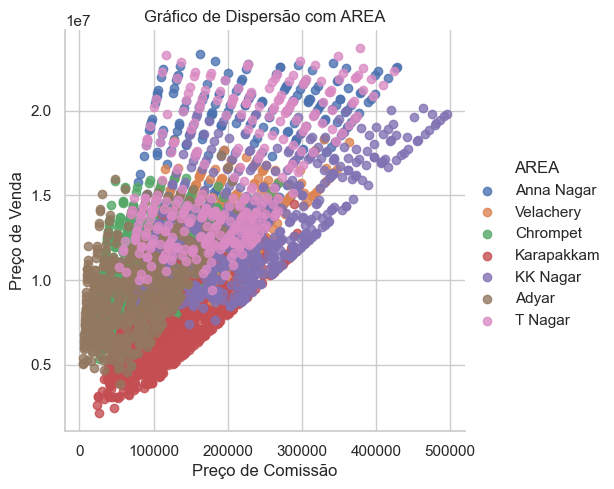

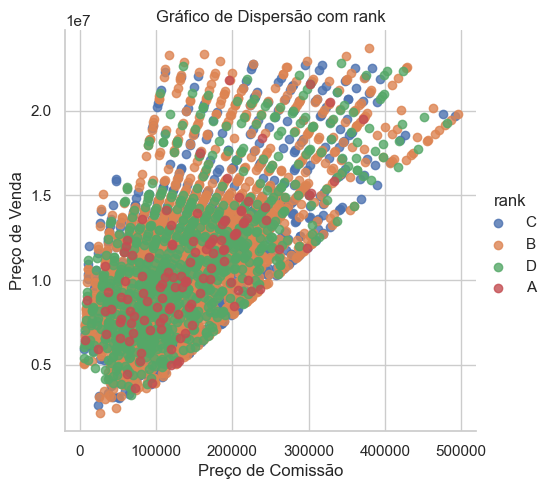

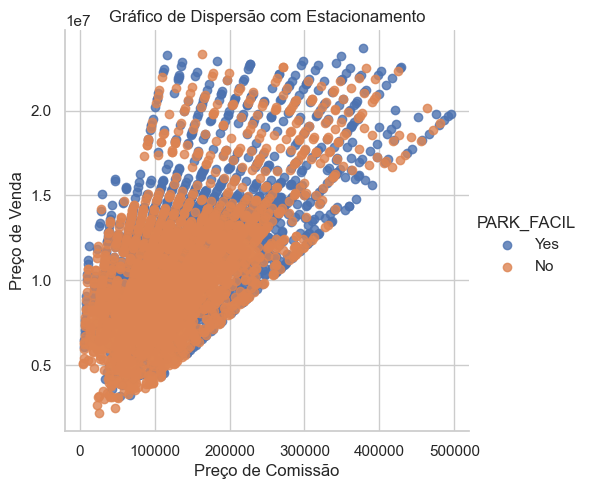

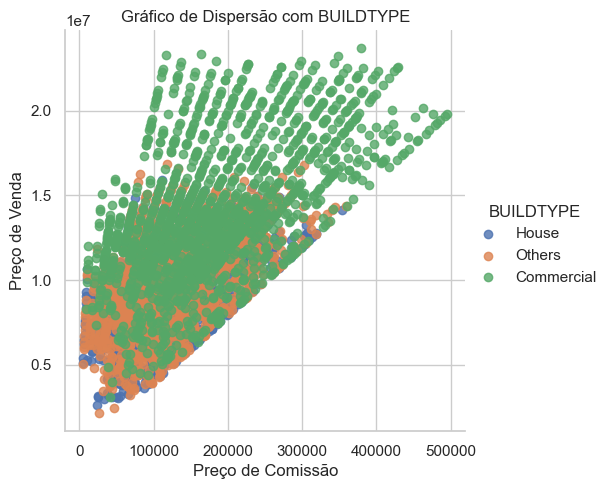

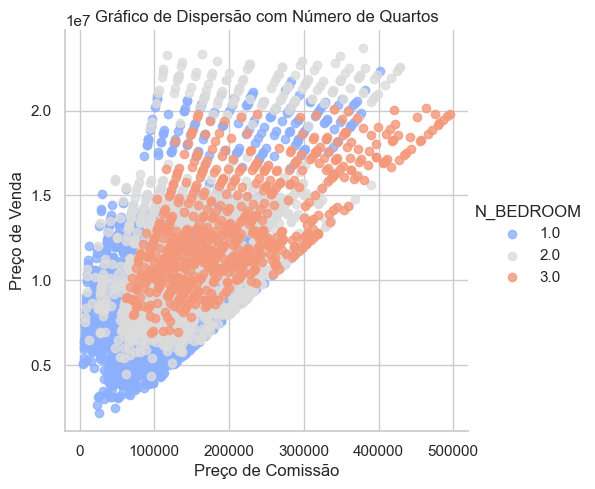

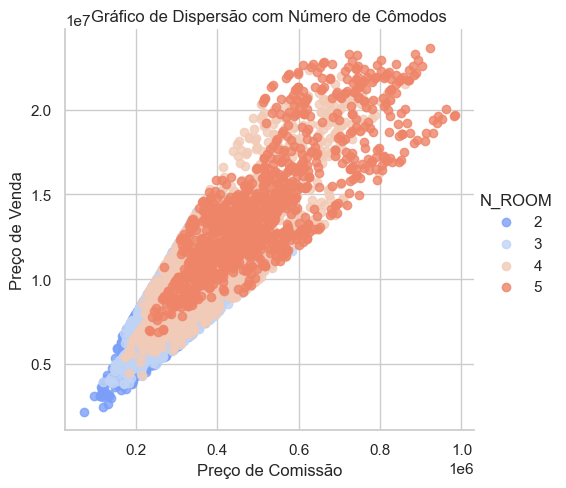

In [251]:
import seaborn as sns
import matplotlib.pyplot as plt

# Suponha que 'preco' seja a variável resposta (eixo y) e 'preco_comissao' seja a variável no eixo x.
# Você deseja analisar como outras variáveis 'qualitativas' e 'quantitativas discretas' se relacionam com 'preco'.
# Substitua 'variavel1', 'variavel2', ... pelos nomes reais das suas variáveis.

sns.set(style="whitegrid")
g = sns.lmplot(x="COMMIS", y="SALES_PRICE", data=df, hue="AREA", fit_reg=False)
g.set_axis_labels("Preço de Comissão", "Preço de Venda")
plt.title("Gráfico de Dispersão com AREA")

# Repita o processo para outras variáveis e valores de "hue" que desejar
g = sns.lmplot(x="COMMIS", y="SALES_PRICE", data=df, hue="rank", fit_reg=False)
g.set_axis_labels("Preço de Comissão", "Preço de Venda")
plt.title("Gráfico de Dispersão com rank")

g = sns.lmplot(x="COMMIS", y="SALES_PRICE", data=df, hue="PARK_FACIL", fit_reg=False)
g.set_axis_labels("Preço de Comissão", "Preço de Venda")
plt.title("Gráfico de Dispersão com Estacionamento")

g = sns.lmplot(x="COMMIS", y="SALES_PRICE", data=df, hue="BUILDTYPE", fit_reg=False)
g.set_axis_labels("Preço de Comissão", "Preço de Venda")
plt.title("Gráfico de Dispersão com BUILDTYPE")

# Para variáveis quantitativas discretas, você pode usar diferentes paletas de cores
g = sns.lmplot(x="COMMIS", y="SALES_PRICE", data=df, hue="N_BEDROOM", fit_reg=False, palette="coolwarm")
g.set_axis_labels("Preço de Comissão", "Preço de Venda")
plt.title("Gráfico de Dispersão com Número de Quartos")

g = sns.lmplot(x="REG_FEE", y="SALES_PRICE", data=df, hue="N_ROOM", fit_reg=False, palette="coolwarm")
g.set_axis_labels("Preço de Comissão", "Preço de Venda")
plt.title("Gráfico de Dispersão com Número de Cômodos")


Text(0.5, 1.0, 'Gráfico de Dispersão com Número de Cômodos')

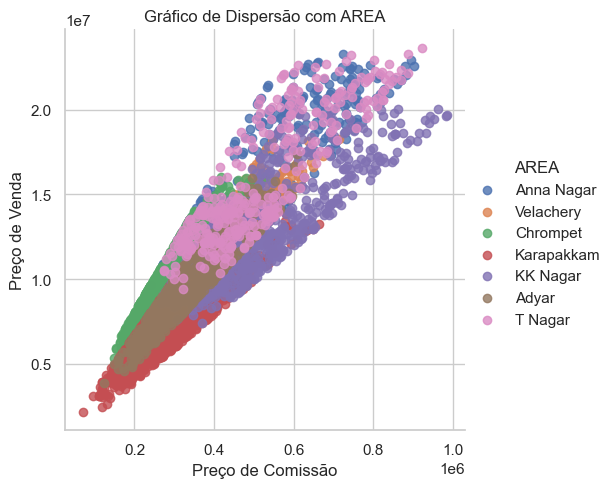

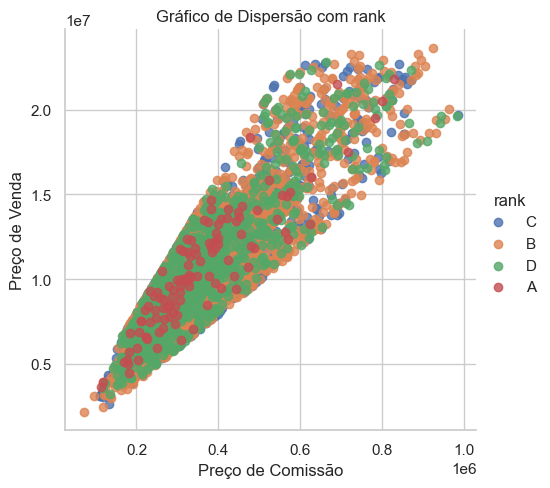

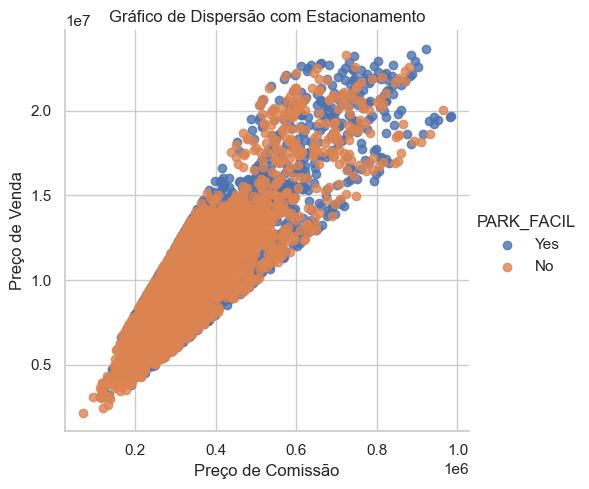

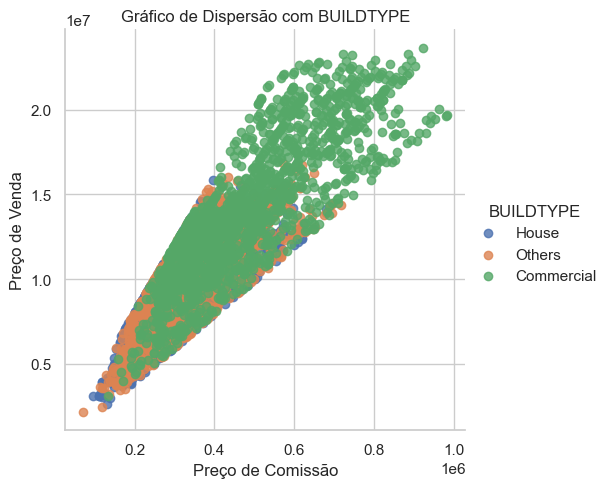

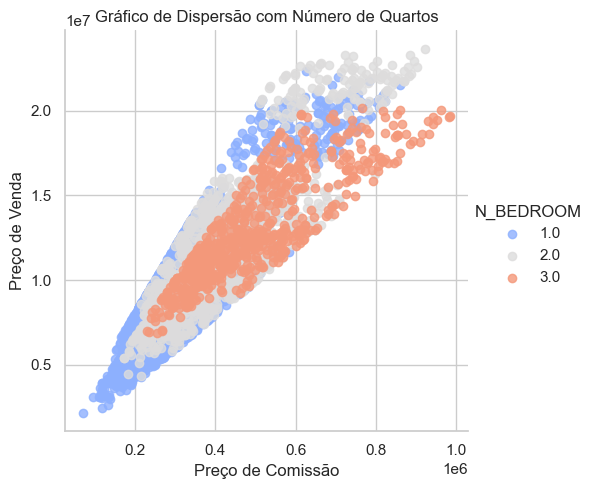

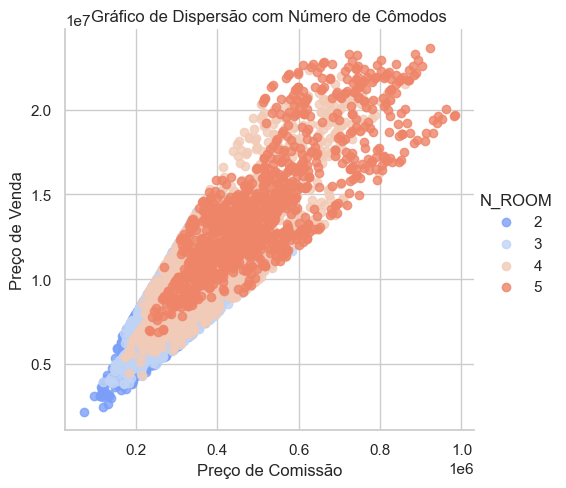

In [252]:
sns.set(style="whitegrid")
g = sns.lmplot(x="REG_FEE", y="SALES_PRICE", data=df, hue="AREA", fit_reg=False)
g.set_axis_labels("Preço de Comissão", "Preço de Venda")
plt.title("Gráfico de Dispersão com AREA")

g = sns.lmplot(x="REG_FEE", y="SALES_PRICE", data=df, hue="rank", fit_reg=False)
g.set_axis_labels("Preço de Comissão", "Preço de Venda")
plt.title("Gráfico de Dispersão com rank")

g = sns.lmplot(x="REG_FEE", y="SALES_PRICE", data=df, hue="PARK_FACIL", fit_reg=False)
g.set_axis_labels("Preço de Comissão", "Preço de Venda")
plt.title("Gráfico de Dispersão com Estacionamento")

g = sns.lmplot(x="REG_FEE", y="SALES_PRICE", data=df, hue="BUILDTYPE", fit_reg=False)
g.set_axis_labels("Preço de Comissão", "Preço de Venda")
plt.title("Gráfico de Dispersão com BUILDTYPE")

g = sns.lmplot(x="REG_FEE", y="SALES_PRICE", data=df, hue="N_BEDROOM", fit_reg=False, palette="coolwarm")
g.set_axis_labels("Preço de Comissão", "Preço de Venda")
plt.title("Gráfico de Dispersão com Número de Quartos")

g = sns.lmplot(x="REG_FEE", y="SALES_PRICE", data=df, hue="N_ROOM", fit_reg=False, palette="coolwarm")
g.set_axis_labels("Preço de Comissão", "Preço de Venda")
plt.title("Gráfico de Dispersão com Número de Cômodos")


Text(0.5, 1.0, 'Gráfico de Dispersão com Número de Cômodos')

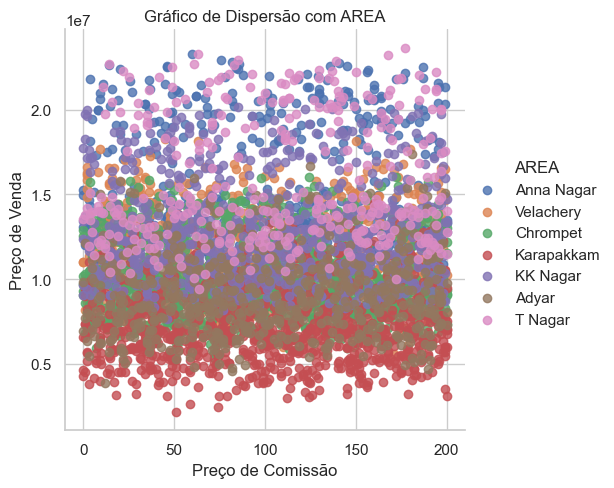

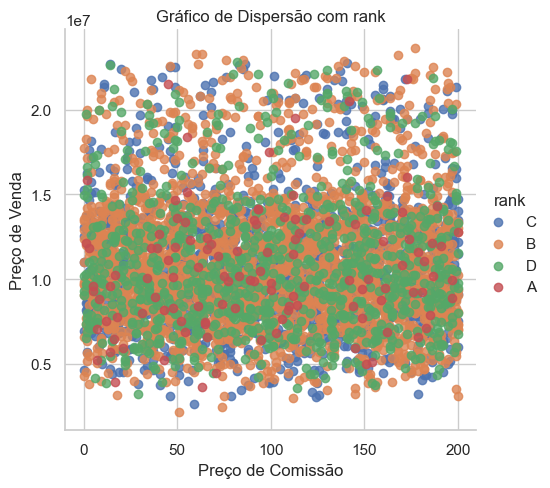

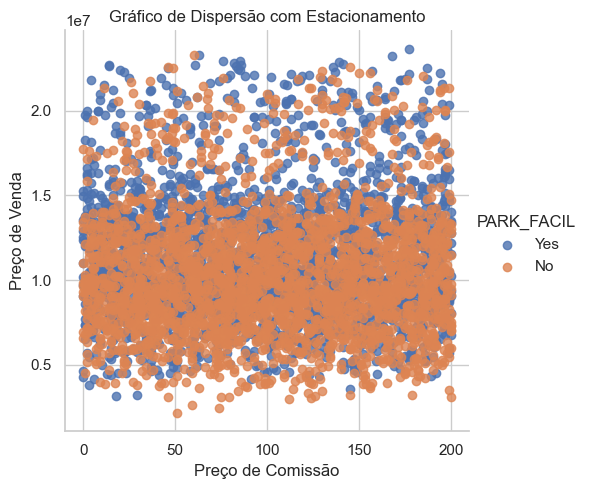

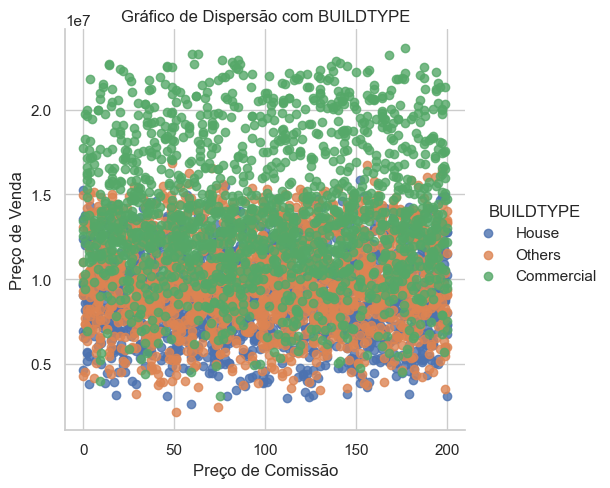

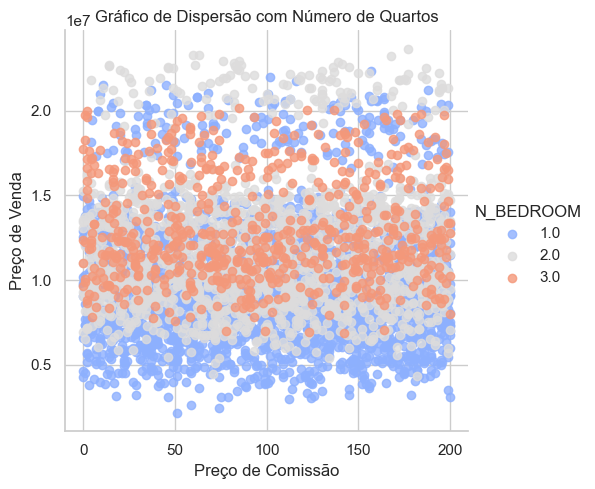

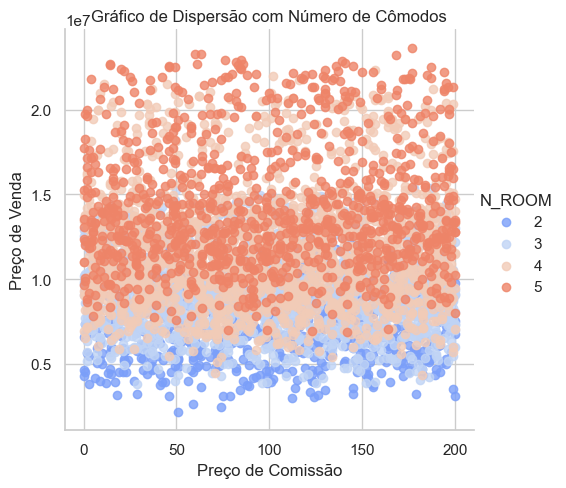

In [253]:
sns.set(style="whitegrid")
g = sns.lmplot(x="DIST_MAINROAD", y="SALES_PRICE", data=df, hue="AREA", fit_reg=False)
g.set_axis_labels("Preço de Comissão", "Preço de Venda")
plt.title("Gráfico de Dispersão com AREA")

g = sns.lmplot(x="DIST_MAINROAD", y="SALES_PRICE", data=df, hue="rank", fit_reg=False)
g.set_axis_labels("Preço de Comissão", "Preço de Venda")
plt.title("Gráfico de Dispersão com rank")

g = sns.lmplot(x="DIST_MAINROAD", y="SALES_PRICE", data=df, hue="PARK_FACIL", fit_reg=False)
g.set_axis_labels("Preço de Comissão", "Preço de Venda")
plt.title("Gráfico de Dispersão com Estacionamento")

g = sns.lmplot(x="DIST_MAINROAD", y="SALES_PRICE", data=df, hue="BUILDTYPE", fit_reg=False)
g.set_axis_labels("Preço de Comissão", "Preço de Venda")
plt.title("Gráfico de Dispersão com BUILDTYPE")

g = sns.lmplot(x="DIST_MAINROAD", y="SALES_PRICE", data=df, hue="N_BEDROOM", fit_reg=False, palette="coolwarm")
g.set_axis_labels("Preço de Comissão", "Preço de Venda")
plt.title("Gráfico de Dispersão com Número de Quartos")

g = sns.lmplot(x="DIST_MAINROAD", y="SALES_PRICE", data=df, hue="N_ROOM", fit_reg=False, palette="coolwarm")
g.set_axis_labels("Preço de Comissão", "Preço de Venda")
plt.title("Gráfico de Dispersão com Número de Cômodos")